# Southern California Airbnb Market Segmentation Using Machine Learning Algorithms

## Author

Adam C. Sanders, Ph.D.

## Project Description

This project leverages machine learning algorithms to perform market segmentation based on several Airbnb datasets. First, I clean and process datasets containing information on Airbnb listings in the Los Angeles and San diego areas. Second, I perform initial exploratory data analysis. Third, I implement K-means clustering and Principal Component Analysis to identify several meaningful clusters of Airbnb listings. Finally, I create several advanced visualization using both geo-spatical data and the results of my analyses.

## Business Case

Airbnb wants to perform market segmentation on several rental properties located in the Southern California area. Specifically, the organization wants to segment the market of Airbnb listings in the Los Angeles and San Diego metropolitan areas. The goal is to segment the existing listings in these areas based on several shared features that might interest different groups of customers. These features include things like *price*, *availability*, and *popularity*.

Ideally, Airbnb would like to establish the following types of segments:
1. **Budget-friendly listings**
2. **High-end listings**
3. **Popular listings**
4. **Extended stay listings**
5. **Accessible listings**

Establishing these market segments has several benefits. By establishing the aforementioned segments, Airbnb can design marketing strategies, advertisements, and promotions that will effectively target specific groups of customers. 

## Problems and Challenges

I need to surmount several challenges. First, I need to gather, clean, and process Airbnb datasets that contain information about the specific Airbnb listings in the San diego and Los Angeles areas. Second, I need to perform market segmentation based on the data. This requires exploratory data analysis and the implementation of several machine learning algorithms. To carry out this task, I will employ *K-means clustering* and *Principal Component Analysis*. Finally, I need to identify any meaningful segments that will help achieve the overall aim described in the business case.

## Strategy and Methodology

**Strategy:** I will employ an unsupervised machine learning algorithm called, "K-means clustering" to segment Airbnb properties into distinct groups with shared features. From those groups, I will attempt to identify the key segments mentioned in the *Business Case* section. Afterwards, I will apply dimensionality reduction by implementing the machine learning algorithm called, "Principal Component Analysis" (i.e., PCA). Finally, I will create several advanced visualizations that illuminate several important aspects in the data.

**Methodology:** I will utilize several data science tools, techniques, and methods to carry out the strategy and solve the business problem. This project will proceed as follows.
1. Import libraries and data.
2. Perform initial exploratory data analysis and create basic data visualizations.
3. Clean, merge, and process the data for the application of the K-means clustering algorithm.
4. Determine the optimal number of clusters using the *elbow method*.
5. Train and implement the K-means clustering algorithm.
6. Locate and identify the clusters that contain the groups of primary interest.
7. Implement the Principal Component Analysis algorithm to perform dimensionality reduction.
8. Create advanced visualizations using the clusters and geo-spatial data.
9. Summarize the project and the results.

## Acknowledgements

Special thanks to *Inside Airbnb* for providing the relevant datasets. The datasets can be accessed here: http://insideairbnb.com/get-the-data.html

## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

print("Libraries imported")

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported


## 2. Import the Data

I need to import two datasets: the Airbnb data for Los Angeles, and the Airbnb data for San Diego.

In [3]:
# Import the LA Airbnb csv file and create a new pandas data frame
LA_file = "C:/Users/adams/Desktop/Data Science/Datasets/LA_listings.csv"
LA_df = pd.read_csv(LA_file)

In [4]:
# Display the first five rows of the 'LA_df' data frame
LA_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,5/15/2016,0.02,1,207
1,2708,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,75,30,27,10/6/2020,0.35,2,335
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,155,1,21,12/27/2019,0.18,2,365
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,50,30,0,NaN,NaN,1,0
4,5729,Zen Room with Floating Bed near Venice and LAX,9171,Sanni,City of Los Angeles,Del Rey,33.98750,-118.43200,Private room,70,30,230,4/11/2020,1.69,4,358


In [5]:
# Examine the shape of 'LA_df'\
LA_df.shape

(30533, 16)

In [6]:
# Import the SD Airbnb csv file and create a new pandas data frame
SD_file = "C:/Users/adams/Desktop/Data Science/Datasets/SD_listings.csv"
SD_df = pd.read_csv(SD_file)

In [7]:
# Display the first five rows of the 'SD_df' data frame
SD_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5570,Ocean front condo on the sand,8435,Jef Karchin,NaN,Mission Bay,32.78430,-117.25258,Entire home/apt,2050,3,0,NaN,NaN,3,197
1,29967,"Great home, 10 min walk to Beach",129123,Michael,NaN,Pacific Beach,32.80724,-117.25630,Entire home/apt,225,4,61,8/31/2020,0.49,5,334
2,38245,Point Loma: Den downstairs,164137,Melinda,NaN,Roseville,32.74202,-117.21870,Private room,74,1,143,10/20/2019,1.16,3,320
3,54001,"La Jolla 2 Bdr Cottage: 1 Qn; 2Twns, Blks 2 Ocn",252692,Marsha,NaN,La Jolla,32.81301,-117.26856,Entire home/apt,135,3,234,10/18/2020,1.96,2,102
4,62274,"charming, colorful, close to beach",302986,Isabel,NaN,Pacific Beach,32.80734,-117.24243,Entire home/apt,69,1,609,9/27/2020,5.06,2,301


In [8]:
# Examine the shape of 'SD_df'
SD_df.shape

(8688, 16)

## 3. Exploratory Data Analysis

### 3.1 Columns, Data Types, and the Number of Null Values

In [9]:
# Examine the data for Los Angeles
LA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30533 entries, 0 to 30532
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              30533 non-null  int64  
 1   name                            30531 non-null  object 
 2   host_id                         30533 non-null  int64  
 3   host_name                       30523 non-null  object 
 4   neighbourhood_group             30533 non-null  object 
 5   neighbourhood                   30533 non-null  object 
 6   latitude                        30533 non-null  float64
 7   longitude                       30533 non-null  float64
 8   room_type                       30533 non-null  object 
 9   price                           30533 non-null  int64  
 10  minimum_nights                  30533 non-null  int64  
 11  number_of_reviews               30533 non-null  int64  
 12  last_review                     

In [10]:
# Examine the data for San Diego
SD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688 entries, 0 to 8687
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8688 non-null   int64  
 1   name                            8688 non-null   object 
 2   host_id                         8688 non-null   int64  
 3   host_name                       8668 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8688 non-null   object 
 6   latitude                        8688 non-null   float64
 7   longitude                       8688 non-null   float64
 8   room_type                       8688 non-null   object 
 9   price                           8688 non-null   int64  
 10  minimum_nights                  8688 non-null   int64  
 11  number_of_reviews               8688 non-null   int64  
 12  last_review                     74

**Remarks:** The dataframes share the same column names. Both sets of data have null values that must be dealt with. However, the entire 'neighbourhood_group' column for SD_df is empty. 

### 3.2 Summary Statistics Including the Averages, Minimum Values, and Maximum Values

#### Los Angeles

In [11]:
# Let's get the average for price
print("average price = ", LA_df["price"].mean())

average price =  218.9086562080372


In [12]:
# Let's get the minimum price
print("minimum price = ", LA_df["price"].min())

minimum price =  0


In [13]:
# Let's look at the maximum value for price
print("maximum price = ", LA_df["price"].max())

maximum price =  24999


In [14]:
# Let's get the average for minimum nights
print("average minimum nights = ", LA_df["minimum_nights"].mean())

average minimum nights =  18.394458454786623


In [15]:
# Let's get the minimum value for minimum nights
print("minimum number of nights = ", LA_df["minimum_nights"].min())

minimum number of nights =  1


In [16]:
# Let's get the maximum value for minimum nights
print("maximum value for minimum nights = ", LA_df["minimum_nights"].max())

maximum value for minimum nights =  1125


In [17]:
# Summary statistics
LA_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.053300e+04,3.053300e+04,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,23802.000000,30533.000000,30533.000000
mean,2.662124e+07,1.011342e+08,34.045726,-118.316447,218.908656,18.394458,35.220679,1.472307,9.769659,171.382832
std,1.378698e+07,1.049147e+08,0.132796,0.168119,588.991246,31.499893,66.003147,1.701793,29.141910,143.090888
min,1.090000e+02,5.210000e+02,33.338770,-118.934220,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.553558e+07,1.488796e+07,33.995750,-118.420850,70.000000,2.000000,1.000000,0.250000,1.000000,11.000000
50%,2.781550e+07,5.678280e+07,34.059320,-118.342310,110.000000,14.000000,7.000000,0.840000,2.000000,158.000000
75%,3.946250e+07,1.634770e+08,34.103560,-118.249030,190.000000,30.000000,39.000000,2.150000,5.000000,332.000000
max,4.579093e+07,3.729809e+08,34.811190,-117.654180,24999.000000,1125.000000,835.000000,31.800000,229.000000,365.000000


#### San Diego

In [18]:
# Let's get the average for price
print("average price = ", SD_df["price"].mean())

average price =  233.45338397790056


In [19]:
# Let's get the minimum price
print("minimum price = ", SD_df["price"].min())

minimum price =  0


In [20]:
# Let's look at the maximum value for price
print("maximum price = ", SD_df["price"].max())

maximum price =  10000


In [21]:
# Let's get the average for minimum nights
print("average minimum nights = ", SD_df["minimum_nights"].mean())

average minimum nights =  5.922651933701657


In [22]:
# Let's get the minimum value for minimum nights
print("minimum number of nights = ", SD_df["minimum_nights"].min())

minimum number of nights =  1


In [23]:
# Let's get the maximum value for minimum nights
print("maximum value for minimum nights = ", SD_df["minimum_nights"].max())

maximum value for minimum nights =  365


In [24]:
# Summary statistics
SD_df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8.688000e+03,8.688000e+03,0.0,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,7462.000000,8688.000000,8688.000000
mean,2.704725e+07,9.374320e+07,NaN,32.768881,-117.186610,233.453384,5.922652,48.156768,1.995997,16.821593,188.078499
std,1.371032e+07,9.678908e+07,NaN,0.065434,0.064596,377.850912,15.457454,75.939252,1.975621,34.293624,121.394909
min,5.570000e+03,8.435000e+03,NaN,32.531580,-117.281430,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.631750e+07,1.532068e+07,NaN,32.727038,-117.250473,93.000000,1.000000,3.000000,0.430000,1.000000,81.000000
50%,2.763402e+07,5.706613e+07,NaN,32.761220,-117.177670,145.000000,2.000000,16.000000,1.340000,3.000000,178.000000
75%,3.994785e+07,1.368190e+08,NaN,32.798593,-117.146120,254.000000,3.000000,62.000000,3.000000,13.000000,307.000000
max,4.603821e+07,3.728712e+08,NaN,33.085820,-116.935710,10000.000000,365.000000,743.000000,21.950000,165.000000,365.000000


**Observations:** 
1. Both areas have similar averages for *price*. LA has an average price of around 219 dollars, and SD has an average price of around 234 dollars. 
2. One peculiar result is that both areas list properties that list the price as being 0.
3. LA has the most expensive property at 24,999 dollars. SD's most expensive property is listed at 10,000 dollars.
4. Both areas have 1 as their minimum values for minimum number of nights.
5. LA has a higher value for the average of minimum nights. LA's average for *minimum_nights* is around 18, whereas SD's average is around 6.
6. Finally, LA has a property where the minimum number of nights is 1125 (that's more than 3 years). On the other hand, SD has a property that requires a minimum stay of 365 nights (1 year).

### 3.3 Drill Down

Let's take a closer look at some of the interesting features I have discoverd. Specifically, I'll examine the following:
1. Airbnb properties with the highest prices.
2. Airbnb properties that list 0 as the price.
3. Airbnb properties with the highest value for minimum number of nights.

#### Los Angeles

In [25]:
# Most expensive LA listing
LA_df[LA_df["price"] == 24999.00]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25288,42117412,"Sweeping Ocean Views, Open Concept, Pool/Spa &...",122055416,SeaBreeze,Other Cities,Malibu,34.04636,-118.88479,Entire home/apt,24999,3,0,NaN,NaN,4,0


In [26]:
# LA listings with 0 as the price
LA_df[LA_df["price"] == 0.00]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23929,40561078,Gold-Diggers Hotel,209561894,Gold Diggers,City of Los Angeles,Hollywood,34.09058,-118.31257,Hotel room,0,1,0,NaN,NaN,12,0
24966,41740614,Hotel Erwin,269304681,Hotel Erwin,City of Los Angeles,Venice,33.98695,-118.47248,Hotel room,0,30,0,NaN,NaN,5,0
25373,42228983,El Patio Inn,311453463,El Patio Inn,City of Los Angeles,Studio City,34.13941,-118.38110,Hotel room,0,1,0,NaN,NaN,1,0
25374,42229033,Nite Inn at Universal City,311439116,Nite Inn @,City of Los Angeles,Studio City,34.13730,-118.36402,Hotel room,0,30,0,NaN,NaN,1,0
25427,42279288,Hotel Shangri-La,271081037,Hotel Shangri-La,Other Cities,Santa Monica,34.01541,-118.49908,Hotel room,0,1,0,NaN,NaN,4,0
25694,42534931,Plaza La Reina,309340353,Plaza La Reina,City of Los Angeles,Westwood,34.05899,-118.44287,Hotel room,0,1,0,NaN,NaN,1,0
25989,42829972,Glendale Express,299524070,Glendale Express Hotel,Other Cities,Glendale,34.15492,-118.26354,Hotel room,0,1,0,NaN,NaN,1,0


In [27]:
# LA listing with the highest value for minimum number of nights
LA_df[LA_df["minimum_nights"] == 1125.00]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23816,40434379,Traveler’s Home in Los Angeles,311174677,Jack,Other Cities,La Verne,34.09734,-117.75785,Private room,45,1125,17,3/15/2020,1.69,1,365


#### San Diego

In [28]:
# Most expensive SD listing
SD_df[SD_df["price"] == 10000.00]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6544,40060375,Cool private apartment in Downtown Sunny San D...,68296487,Cynthia,NaN,Grant Hill,32.70942,-117.14494,Entire home/apt,10000,2,1,12/5/2019,0.09,1,82


In [29]:
# SD listing with 0 as the price
SD_df[SD_df["price"] == 0.00]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7516,43499167,La Jolla Cove,346934536,Brandon,NaN,La Jolla,32.84971,-117.27326,Hotel room,0,1,0,NaN,NaN,1,0


In [30]:
# SD listing with the highest value for minimum number of nights
SD_df[SD_df["minimum_nights"] == 365.00]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1935,14761149,Mid Mod Beach House,78504580,Susan,NaN,Pacific Beach,32.80881,-117.24755,Entire home/apt,443,365,0,NaN,NaN,3,337
4040,25976877,Your French Country Hideaway...,40929877,Jason & Jackie,NaN,Otay Ranch,32.59520,-117.00206,Private room,48,365,10,8/2/2019,0.36,2,365
4169,26667266,Relaxing Southern California Home~ Model Home ...,40929877,Jason & Jackie,NaN,Otay Ranch,32.59494,-117.00152,Private room,28,365,5,8/12/2018,0.18,2,365
4405,28183624,San Diego Apartment,6532123,Deborah,NaN,Balboa Park,32.71955,-117.13682,Entire home/apt,119,365,0,NaN,NaN,4,365
5544,35383809,Beautiful 3 story Condo in Luxury Area Santaluz.,86614891,Dennise,NaN,Rancho Penasquitos,32.99017,-117.16509,Entire home/apt,5000,365,0,NaN,NaN,1,90


**Remarks:**
1. LA's most expensive property is 24,999 dollars. The listing includes the entire home, which is located near the beach in Malibu. On the other hand, SD's most expensive property is only 10,000 dollars. Unlike LA, this listing is a private apartment in the downtwon part of SD.
2. Both LA and SD have listings for only 0 dollars. These properties are hotel rooms, and the low value is likely due to some promotion. What is also interesting is that LA has 7 hotel rooms listed for 0 dollars, whereas SD only has 1 hotel room listed at that price.
3. LA has a private room that requires 1,125 minimum nights (around 3 years). Contrary to this, the highest value for minimum nights in SD is only 365 (1 year). But there are 5 listings in SD that require a minimum of 365 nights.

### 3.4 Analyzing Unique Property Types

Let's examine the types of properties available in LA and SD.

#### Los Angeles

In [31]:
# Generate a list of unique values for 'room_type'
LA_df["room_type"].unique().tolist()

['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']

In [32]:
# The number of unique properties 
LA_df["room_type"].value_counts()

Entire home/apt    19635
Private room        9750
Shared room          993
Hotel room           155
Name: room_type, dtype: int64

#### San Diego

In [33]:
# Generate a list of unique values for 'room_type'
SD_df["room_type"].unique().tolist()

['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']

In [34]:
# The number of unique properties 
SD_df["room_type"].value_counts()

Entire home/apt    6913
Private room       1676
Shared room          75
Hotel room           24
Name: room_type, dtype: int64

**Observations:**
1. Both areas have the same types of unique properties.
2. The majority of the listings for both areas include entire homes or apartments. Moreover, hotel rooms in both areas are the scarcest type of property.

I'll now examine the correlations that hold between different features.

### 3.5 Data Visualizations

I'll now visualize the data, including the distribution of null values. Constructing visualizations can help detect interesting trends and patterns.

#### Heat Maps

Let's first construct some heat maps to visualize the distribution of null values in the data frames.

##### LA Heat Map 

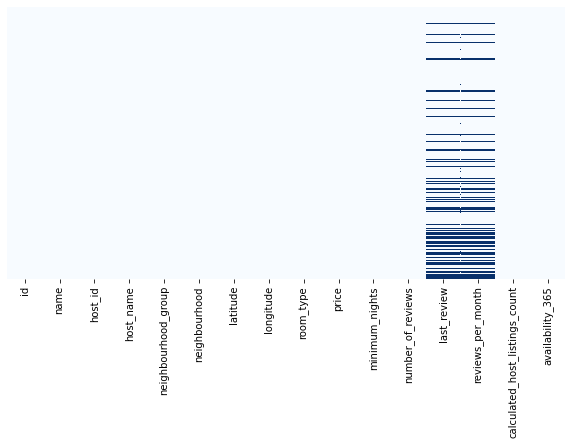

In [35]:
# heatmap to visualize any null values in the 'LA_df' data frame
plt.figure(figsize = (10, 5))
sns.heatmap(LA_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

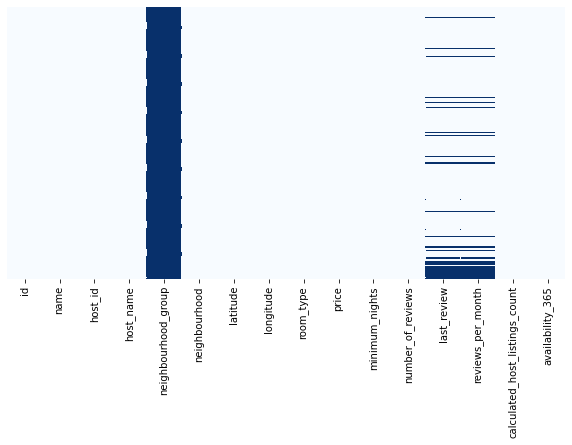

In [36]:
# heatmap to visualize any null values in the 'SD_df' data frame
plt.figure(figsize = (10, 5))
sns.heatmap(SD_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

**Observations:** there are quite a few missing values in both data frames. But the 'SD_df' data frame has a substantial amount of null values. I will handle missing values later when I beging to clean and process the data.

#### Box Plots

I'll create a few boxplots that visualize the ranges of prices associated with different types of rooms.

##### Los Angeles Box Plots

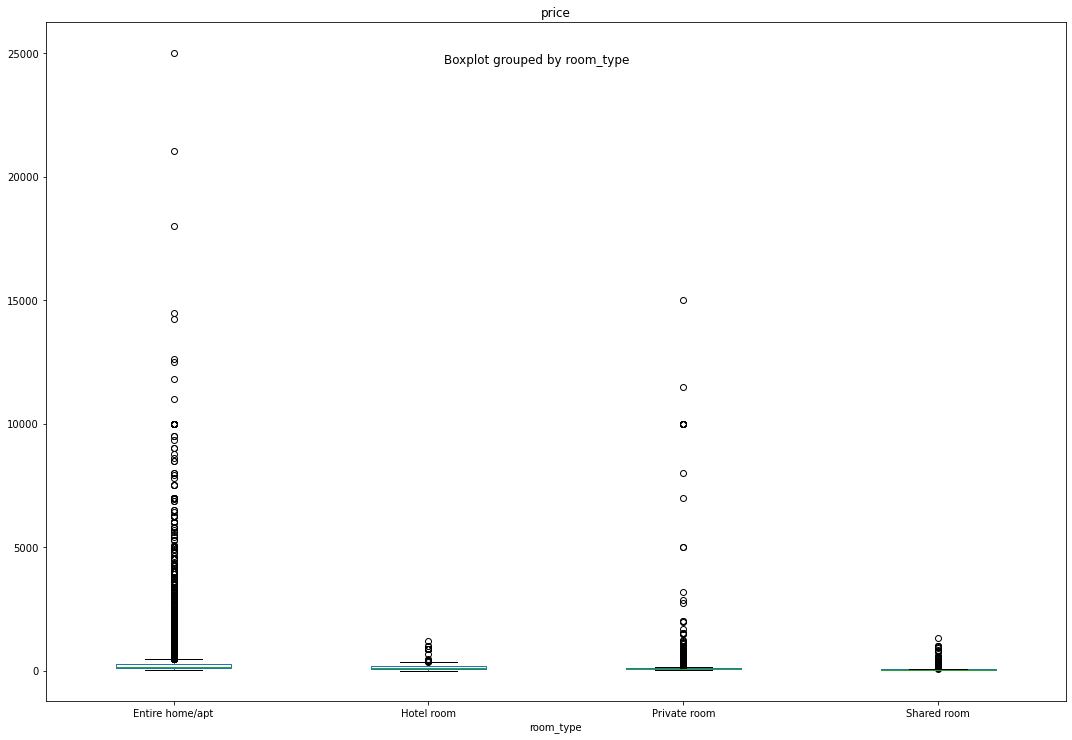

In [37]:
# Create a box plot that visualizes room types and price
LA_df.boxplot(by ="room_type", column =["price"], layout=(4,1),figsize=(15,40), grid = False)
plt.tight_layout()

##### SD Box Plots

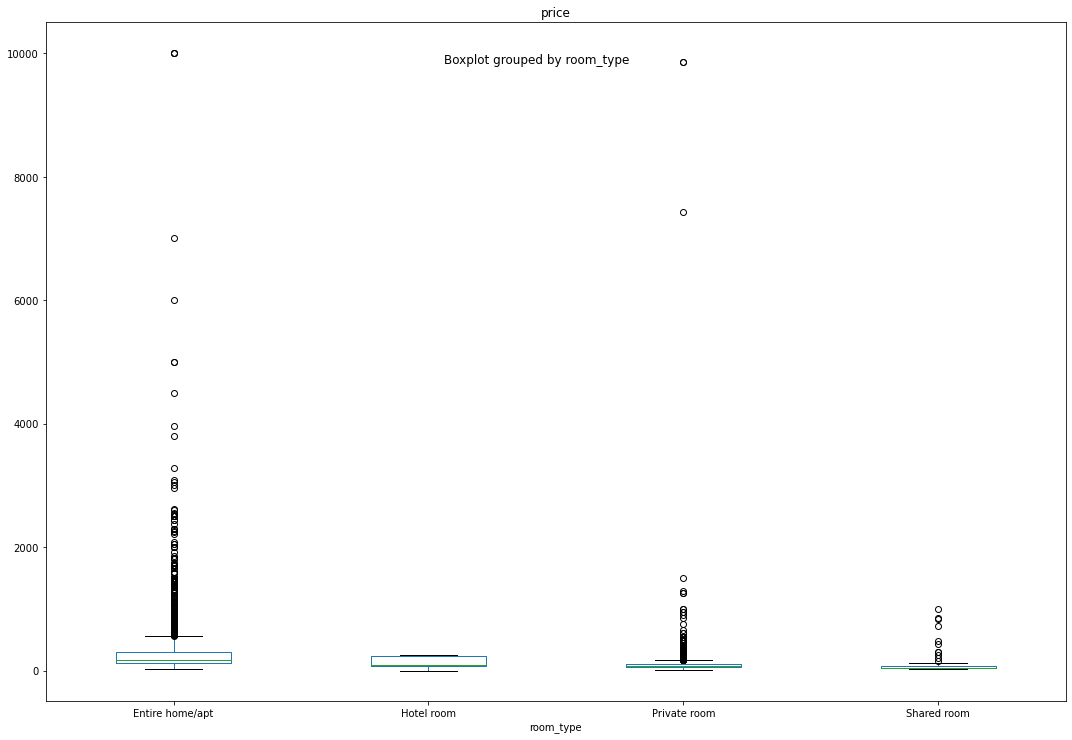

In [38]:
# Create a box plot that visualizes room types and price
SD_df.boxplot(by ="room_type", column =["price"], layout=(4, 1), figsize=(15,40), grid = False)
plt.tight_layout()

**Observations:** The box plots show that private rooms and entire homes/apartments in both areas have a wider range of prices with many outliers above the upper quartile.

#### Histograms

I'll now visualize the distribution of values for the features, *minimum nights* and *price*.

##### Minimum NIghts in LA

Text(0, 0.5, 'Frequency')

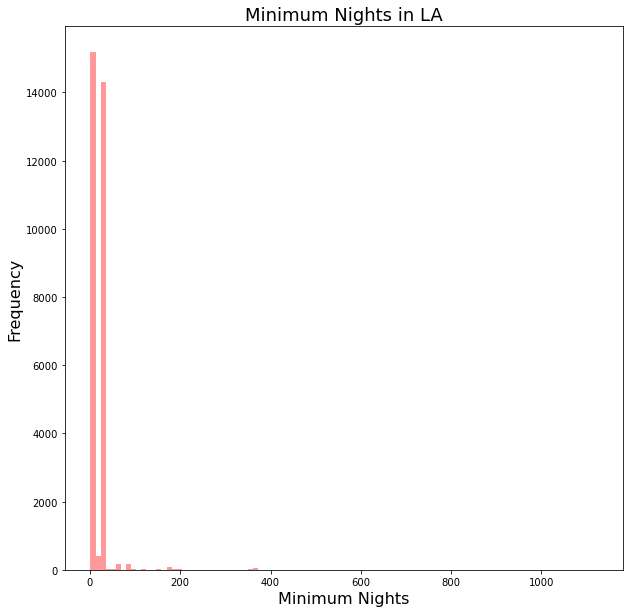

In [39]:
# Create a histogram for minimum nights in LA
plt.figure(figsize = (10, 10))
sns.distplot(LA_df["minimum_nights"], color = "red", kde = False, bins = 100)
plt.title("Minimum Nights in LA", fontsize=18)
plt.xlabel("Minimum Nights", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

##### Airbnb Price in LA

Text(0, 0.5, 'Frequency')

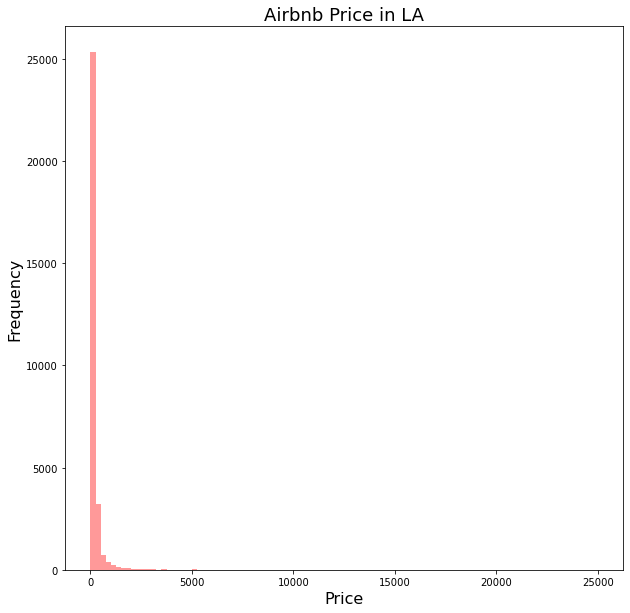

In [40]:
# Create a histogram for price in LA
plt.figure(figsize = (10, 10))
sns.distplot(LA_df["price"], color = "red", kde = False, bins = 100)
plt.title("Airbnb Price in LA", fontsize=18)
plt.xlabel("Price", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

##### Minimum Nights in SD

Text(0, 0.5, 'Frequency')

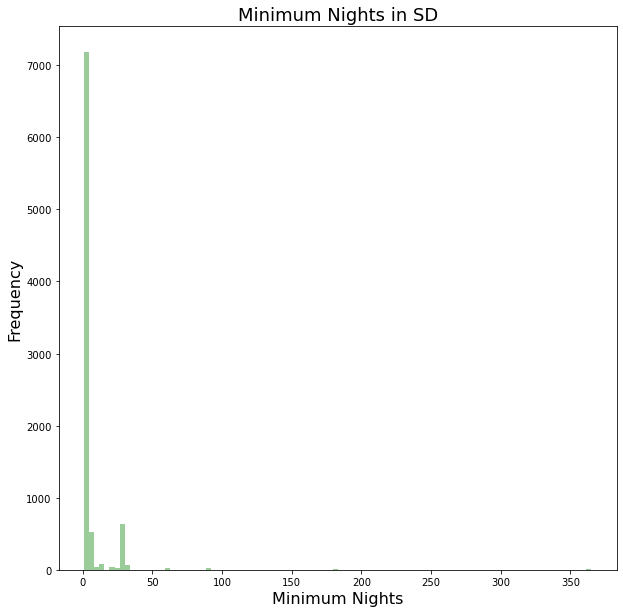

In [41]:
# Create a histogram for minimum nights in SD
plt.figure(figsize = (10, 10))
sns.distplot(SD_df["minimum_nights"], color = "green", kde = False, bins = 100)
plt.title("Minimum Nights in SD", fontsize=18)
plt.xlabel("Minimum Nights", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

##### Airbnb Price in SD

Text(0, 0.5, 'Frequency')

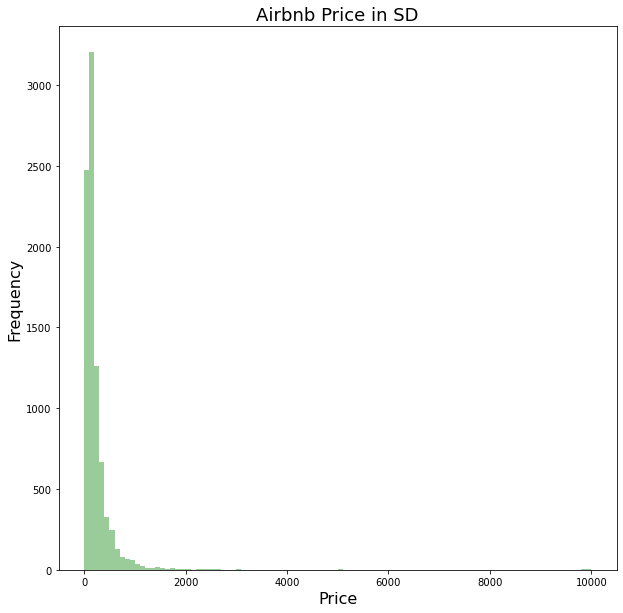

In [42]:
# Create a histogram for price in SD
plt.figure(figsize = (10, 10))
sns.distplot(SD_df["price"], color = "green", kde = False, bins = 100)
plt.title("Airbnb Price in SD", fontsize=18)
plt.xlabel("Price", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

**Observations:** The histograms are skewed right. We see that that lower prices in both areas have the highest frequency. As noted earlier, the average price in LA is 218.91 and the average price in SD is 233.45. Similarly, the lower values for minimum nights have the highest frequency in both LA and SD. The average minimum number of nights in LA is 18 and the average minimum number of nights in SD is 6.

## 4. Data Cleansing

At this point, I'm going to clean, process, and merge the data into a single data frame to be used for analysis.

### 4.1 Dropping Irrelevant Columns

There are several columns that are not necessary for this project. These columns include *name*, *host_id*, and *host_name*. Moreover, it was previously shown that the data frame for San Diego (i.e., *SD_df*) does not have any values under the *neighborhood_group* column. Consequently, I will eliminate that column from both data frames.

In [43]:
# Display the columns in LA_df
LA_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [44]:
# Drop the irrelevant columns from lA_df
LA_df_drop = LA_df[["id", "neighbourhood", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365"]]

# Display the first five rows of the new data frame
LA_df_drop.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,109,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,0.02,207
1,2708,Hollywood,34.09768,-118.34602,Private room,75,30,27,0.35,335
2,2732,Santa Monica,34.00475,-118.48127,Private room,155,1,21,0.18,365
3,2864,Bellflower,33.87619,-118.11397,Entire home/apt,50,30,0,NaN,0
4,5729,Del Rey,33.98750,-118.43200,Private room,70,30,230,1.69,358


In [45]:
# Look at the shape of the data frame
LA_df_drop.shape

(30533, 10)

In [46]:
# Drop the irrelevant columns from SD_df
SD_df_drop = SD_df[["id", "neighbourhood", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365"]]

# Display the first five rows of the new data frame
SD_df_drop.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,5570,Mission Bay,32.78430,-117.25258,Entire home/apt,2050,3,0,NaN,197
1,29967,Pacific Beach,32.80724,-117.25630,Entire home/apt,225,4,61,0.49,334
2,38245,Roseville,32.74202,-117.21870,Private room,74,1,143,1.16,320
3,54001,La Jolla,32.81301,-117.26856,Entire home/apt,135,3,234,1.96,102
4,62274,Pacific Beach,32.80734,-117.24243,Entire home/apt,69,1,609,5.06,301


In [47]:
# Look at the shape of the data frame
SD_df_drop.shape

(8688, 10)

### 4.2 Adding a Column for the Relevant Metropolitan Area

Note that the data frames contain a *neighbourhood* column specifying the specific neighborhood that a listing is located within. However, I also want to add a column that specifies the relevant metropolitan area.

#### Los Angeles

In [48]:
# Adding an "Area" column to LA_drop_df
LA_df_drop["Area"] = "Los Angeles"

# Display the first five rows
LA_df_drop.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Area
0,109,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,0.02,207,Los Angeles
1,2708,Hollywood,34.09768,-118.34602,Private room,75,30,27,0.35,335,Los Angeles
2,2732,Santa Monica,34.00475,-118.48127,Private room,155,1,21,0.18,365,Los Angeles
3,2864,Bellflower,33.87619,-118.11397,Entire home/apt,50,30,0,NaN,0,Los Angeles
4,5729,Del Rey,33.98750,-118.43200,Private room,70,30,230,1.69,358,Los Angeles


In [49]:
# Ensure that the column only contains one value: "Los Angeles"
LA_df_drop["Area"].unique().tolist()

['Los Angeles']

In [50]:
# Ensure that the column doesn't contain any null values
LA_df_drop["Area"].isnull().sum()

0

In [51]:
# Examine the shape of the data frame with the new column
LA_df_drop.shape

(30533, 11)

#### San Diego

In [52]:
# Adding an "Area" column to SD_drop_df
SD_df_drop["Area"] = "San Diego"

# Display the first five rows
SD_df_drop.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Area
0,5570,Mission Bay,32.78430,-117.25258,Entire home/apt,2050,3,0,NaN,197,San Diego
1,29967,Pacific Beach,32.80724,-117.25630,Entire home/apt,225,4,61,0.49,334,San Diego
2,38245,Roseville,32.74202,-117.21870,Private room,74,1,143,1.16,320,San Diego
3,54001,La Jolla,32.81301,-117.26856,Entire home/apt,135,3,234,1.96,102,San Diego
4,62274,Pacific Beach,32.80734,-117.24243,Entire home/apt,69,1,609,5.06,301,San Diego


In [53]:
# Ensure that the column only contains one value: "San Diego"
SD_df_drop["Area"].unique().tolist()

['San Diego']

In [54]:
# Ensure that the column doesn't contain any null values
SD_df_drop["Area"].isnull().sum()

0

In [55]:
# Examine the shape of the data frame with the new column
SD_df_drop.shape

(8688, 11)

### 4.3 Merging the Data

Given that I am working with multiple sets of data, it would be beneficial to combine the data into a single data frame. Doing so will make the remaining cleansing and processing processes simpler and more efficient.

**Note:** Both data frames have the same headers. Merging the data frames should be straightforward. 

In [56]:
# Use concat() to combine LA_df_drop and SD_df_drop and create a new dataframe, "df_concat"
df_concat = pd.concat([LA_df_drop, SD_df_drop], ignore_index=True)

In [57]:
# Display the first five rows of the data frame
df_concat.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Area
0,109,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,0.02,207,Los Angeles
1,2708,Hollywood,34.09768,-118.34602,Private room,75,30,27,0.35,335,Los Angeles
2,2732,Santa Monica,34.00475,-118.48127,Private room,155,1,21,0.18,365,Los Angeles
3,2864,Bellflower,33.87619,-118.11397,Entire home/apt,50,30,0,NaN,0,Los Angeles
4,5729,Del Rey,33.98750,-118.43200,Private room,70,30,230,1.69,358,Los Angeles


In [58]:
# Display the last five rows
df_concat.tail()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Area
39216,46028900,Pacific Beach,32.797710,-117.229690,Entire home/apt,70,4,0,NaN,9,San Diego
39217,46035696,East Village,32.713790,-117.150310,Entire home/apt,214,1,0,NaN,162,San Diego
39218,46036151,East Village,32.711490,-117.151210,Entire home/apt,214,1,0,NaN,162,San Diego
39219,46037988,Balboa Park,32.723900,-117.131330,Entire home/apt,286,2,0,NaN,364,San Diego
39220,46038206,Pacific Beach,32.805396,-117.219775,Entire home/apt,74,1,0,NaN,358,San Diego


In [59]:
# Examine the shape of the data frame
df_concat.shape

(39221, 11)

In [60]:
# Check the unique types of values in the 'Area' column: there should only be 'Los Angeles' and 'San Diego'
df_concat["Area"].unique().tolist()

['Los Angeles', 'San Diego']

In [61]:
# Get the number of unique values in the 'Area' column
df_concat["Area"].value_counts()

Los Angeles    30533
San Diego       8688
Name: Area, dtype: int64

### 4.4 Missing Values

In this section, I will identify and handle missing values in the dataset.

#### Locate Missing Values

In [62]:
df_concat.isnull().sum()

id                      0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
minimum_nights          0
number_of_reviews       0
reviews_per_month    7957
availability_365        0
Area                    0
dtype: int64

**Remark:** There are missing values under the *reviews_per_month* column. Let me determine the percentage of missing values.

In [63]:
# Create a dataframe that shows the percentage of missing values in each column
percent_missing = df_concat.isnull().sum() * 100 / len(df_concat)
missing_values = pd.DataFrame({"percent_missing": percent_missing})

# Display the missing_values dataframe
missing_values

,percent_missing
id,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000
minimum_nights,0.000000
number_of_reviews,0.000000
reviews_per_month,20.287601
availability_365,0.000000


**Observation:** Missing values only make up approximately 20% of the values in *reviews_per_month*. For my purpose, I will simply impute the missing values with the *mean* value for that column.

In [64]:
# Impute missing values using the mean
df_concat = df_concat.fillna(df_concat.mean())

In [65]:
# Check for missing values
df_concat.isnull().sum()

id                   0
neighbourhood        0
latitude             0
longitude            0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
availability_365     0
Area                 0
dtype: int64

**Remark:** The data frame is free of missing values. However, it was previously noted that there was a small subset of listings that had a price of 0. My intuition is that this is neither typical nor realistic given that renting a property is rarely free. It is likely that the price of 0 reflects some promotion or deal that is applied to the overall price after certain conditions are met (e.g., renting a certain number of nights). Considering that we only have a small number of these properties, I will replace those numbers with the *median* value. I will use the median value considering that the price column contains several extreme outliers.

In [66]:
# Locate instances where the price is 0
df_concat[df_concat["price"] == 0]

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Area
23929,40561078,Hollywood,34.09058,-118.31257,Hotel room,0,1,0,1.5973,0,Los Angeles
24966,41740614,Venice,33.98695,-118.47248,Hotel room,0,30,0,1.5973,0,Los Angeles
25373,42228983,Studio City,34.13941,-118.38110,Hotel room,0,1,0,1.5973,0,Los Angeles
25374,42229033,Studio City,34.13730,-118.36402,Hotel room,0,30,0,1.5973,0,Los Angeles
25427,42279288,Santa Monica,34.01541,-118.49908,Hotel room,0,1,0,1.5973,0,Los Angeles
25694,42534931,Westwood,34.05899,-118.44287,Hotel room,0,1,0,1.5973,0,Los Angeles
25989,42829972,Glendale,34.15492,-118.26354,Hotel room,0,1,0,1.5973,0,Los Angeles
38049,43499167,La Jolla,32.84971,-117.27326,Hotel room,0,1,0,1.5973,0,San Diego


In [67]:
# Determine the median value for the 'price' column
price_median = df_concat["price"].astype("float").median(axis = 0)
print("The median value of the price column: ", price_median)

The median value of the price column:  119.0


In [68]:
# Replace 0 with the median value
df_concat["price"].replace(0, price_median, inplace = True)

In [69]:
# Check to see if there are any instances where the price is 0
df_concat[df_concat["price"] == 0]

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Area


In [70]:
# Check the summary statistics
df_concat.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,3.922100e+04,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,2.671561e+07,33.762887,-118.066172,222.154790,15.631779,38.086204,1.597300,175.081156
std,1.377099e+07,0.543900,0.493016,549.285676,29.192260,68.538659,1.593659,138.749972
min,1.090000e+02,32.531580,-118.934220,10.000000,1.000000,0.000000,0.010000,0.000000
25%,1.567706e+07,33.771770,-118.388810,75.000000,2.000000,1.000000,0.390000,38.000000
50%,2.778359e+07,34.032680,-118.291850,119.000000,3.000000,9.000000,1.540000,164.000000
75%,3.959962e+07,34.093630,-117.916330,200.000000,30.000000,44.000000,1.920000,327.000000
max,4.603821e+07,34.811190,-116.935710,24999.000000,1125.000000,835.000000,31.800000,365.000000


**Remark:** All missing and anomalous values have been corrected.

### 4.5 Duplicate Data

I'll now check to see if there are any duplicate rows in the data frame. If there are, then I will proceed to remove the duplicated data.

In [71]:
# Check for any duplicates in the data
duplicate = df_concat.duplicated().sum()
print("Number of duplicate rows: ", duplicate)

Number of duplicate rows:  0


**Remark:** We are good to go.

### 4.6 Formatting Column Names and Standardizing Information

In this section, I'm going to clean up the headers by removing underscores and converting the column names into title format. Moreover, I want to change "neighbourhood" to "Neighborhood" to keep the spelling in line with U.S. linguistic styles and customs.

In [72]:
# Adjust column names
df_concat.rename(columns={"id": "ID", "latitude":"Latitude", "longitude":"Longitude", "neighbourhood":"Neighborhood", "room_type":"Room Type", "price":"Price", "minimum_nights":"Minimum Nights", "number_of_reviews":"Number of Reviews", "reviews_per_month":"Reviews per Month", "availability_365": "Availability (365)"}, inplace=True)

# Display the columns
df_concat.columns

Index(['ID', 'Neighborhood', 'Latitude', 'Longitude', 'Room Type', 'Price',
       'Minimum Nights', 'Number of Reviews', 'Reviews per Month',
       'Availability (365)', 'Area'],
      dtype='object')

In [73]:
df_concat.head()

,ID,Neighborhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Area
0,109,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,0.0200,207,Los Angeles
1,2708,Hollywood,34.09768,-118.34602,Private room,75,30,27,0.3500,335,Los Angeles
2,2732,Santa Monica,34.00475,-118.48127,Private room,155,1,21,0.1800,365,Los Angeles
3,2864,Bellflower,33.87619,-118.11397,Entire home/apt,50,30,0,1.5973,0,Los Angeles
4,5729,Del Rey,33.98750,-118.43200,Private room,70,30,230,1.6900,358,Los Angeles


### 4.7 Check Data Types

Let's examine the types of data and fix any errors by converting data into the proper type.

In [74]:
# Use dtypes to check the specific types of data
df_concat.dtypes

ID                      int64
Neighborhood           object
Latitude              float64
Longitude             float64
Room Type              object
Price                   int64
Minimum Nights          int64
Number of Reviews       int64
Reviews per Month     float64
Availability (365)      int64
Area                   object
dtype: object

**Remark:** It seems that I am working with the proper data types. But for the sake of consistency, I will convert integers into floats.

In [75]:
# Let's convert all integers (excluding ID) into floats
df_concat["Price"] = df_concat["Price"].astype(float)
df_concat["Minimum Nights"] = df_concat["Minimum Nights"].astype(float)
df_concat["Number of Reviews"] = df_concat["Number of Reviews"].astype(float)
df_concat["Availability (365)"] = df_concat["Availability (365)"].astype(float)

In [76]:
# Check data types
df_concat.dtypes

ID                      int64
Neighborhood           object
Latitude              float64
Longitude             float64
Room Type              object
Price                 float64
Minimum Nights        float64
Number of Reviews     float64
Reviews per Month     float64
Availability (365)    float64
Area                   object
dtype: object

In [77]:
# check the first five rows
df_concat.head()

,ID,Neighborhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Area
0,109,Culver City,33.98209,-118.38494,Entire home/apt,115.0,30.0,2.0,0.0200,207.0,Los Angeles
1,2708,Hollywood,34.09768,-118.34602,Private room,75.0,30.0,27.0,0.3500,335.0,Los Angeles
2,2732,Santa Monica,34.00475,-118.48127,Private room,155.0,1.0,21.0,0.1800,365.0,Los Angeles
3,2864,Bellflower,33.87619,-118.11397,Entire home/apt,50.0,30.0,0.0,1.5973,0.0,Los Angeles
4,5729,Del Rey,33.98750,-118.43200,Private room,70.0,30.0,230.0,1.6900,358.0,Los Angeles


### 4.8 One-hot Encoding

The data frame contains categorical variables. To apply the machine learning algorithms, I need to convert these variables into a form of numerical format. I will use the *get_dummies()* method to implement one-hot encoding.

In [78]:
# Get indicator variables for Room Type
dummies1 = pd.get_dummies(df_concat["Room Type"])

# Display the first five rows of the 'dummies1' data frame
dummies1.head()

,Entire home/apt,Hotel room,Private room,Shared room
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [79]:
# Rename the columns of the data frame
dummies1.rename(columns = {"Entire home/apt": "Entire Home", "Hotel room": "Hotel Room", "Private room": "Private Room", "Shared room":"Shared Room"}, inplace =True)

# Display the first five rows of the data frame
dummies1.head()

,Entire Home,Hotel Room,Private Room,Shared Room
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [80]:
# Join the 'dummies1' data frame with the 'df_concat' dataframe using the concat() method
df_dummies1 = pd.concat([df_concat, dummies1], axis = 1)

# Drop the original column titled, 'Room Type'
df_dummies1.drop("Room Type", axis = 1, inplace = True)

In [81]:
# Display the first five rows of 'df_dummies1'
df_dummies1.head()

,ID,Neighborhood,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Area,Entire Home,Hotel Room,Private Room,Shared Room
0,109,Culver City,33.98209,-118.38494,115.0,30.0,2.0,0.0200,207.0,Los Angeles,1,0,0,0
1,2708,Hollywood,34.09768,-118.34602,75.0,30.0,27.0,0.3500,335.0,Los Angeles,0,0,1,0
2,2732,Santa Monica,34.00475,-118.48127,155.0,1.0,21.0,0.1800,365.0,Los Angeles,0,0,1,0
3,2864,Bellflower,33.87619,-118.11397,50.0,30.0,0.0,1.5973,0.0,Los Angeles,1,0,0,0
4,5729,Del Rey,33.98750,-118.43200,70.0,30.0,230.0,1.6900,358.0,Los Angeles,0,0,1,0


In [82]:
# Get indicator variables for 'Area'
dummies2 = pd.get_dummies(df_dummies1["Area"])

# Display the first five rows of the 'dummies1' data frame
dummies2.head()

,Los Angeles,San Diego
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [83]:
# Join the 'dummies2' data frame with the 'df_dummies1' dataframe using the concat() method
df = pd.concat([df_dummies1, dummies2], axis = 1)

# Drop the original column titled, 'Room Type'
df.drop("Area", axis = 1, inplace = True)

In [84]:
# Display the first five rows of the new data frame with indicator variables
df.head()

,ID,Neighborhood,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Entire Home,Hotel Room,Private Room,Shared Room,Los Angeles,San Diego
0,109,Culver City,33.98209,-118.38494,115.0,30.0,2.0,0.0200,207.0,1,0,0,0,1,0
1,2708,Hollywood,34.09768,-118.34602,75.0,30.0,27.0,0.3500,335.0,0,0,1,0,1,0
2,2732,Santa Monica,34.00475,-118.48127,155.0,1.0,21.0,0.1800,365.0,0,0,1,0,1,0
3,2864,Bellflower,33.87619,-118.11397,50.0,30.0,0.0,1.5973,0.0,1,0,0,0,1,0
4,5729,Del Rey,33.98750,-118.43200,70.0,30.0,230.0,1.6900,358.0,0,0,1,0,1,0


In [85]:
# Display the last five rows of 'df'
df.tail()

,ID,Neighborhood,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Entire Home,Hotel Room,Private Room,Shared Room,Los Angeles,San Diego
39216,46028900,Pacific Beach,32.797710,-117.229690,70.0,4.0,0.0,1.5973,9.0,1,0,0,0,0,1
39217,46035696,East Village,32.713790,-117.150310,214.0,1.0,0.0,1.5973,162.0,1,0,0,0,0,1
39218,46036151,East Village,32.711490,-117.151210,214.0,1.0,0.0,1.5973,162.0,1,0,0,0,0,1
39219,46037988,Balboa Park,32.723900,-117.131330,286.0,2.0,0.0,1.5973,364.0,1,0,0,0,0,1
39220,46038206,Pacific Beach,32.805396,-117.219775,74.0,1.0,0.0,1.5973,358.0,1,0,0,0,0,1


### 4.9 Feature Selection

Given the primary aim of the project, I'm going to temporarily drop some of the columns and create a new, simpler data frame that focuses on price, reviews, availability, and minimum number of nights. I will therefore temporarily drop all columns except for *Price*, *Minimum Nights*, *Number of Reviews*, *Reviews per Month*, and *Availability (365)*. The resulting data frame will be ideal for the K-means clustering algorithm.

In [86]:
# Assign the relevant columns that need to be dropped to a new data frame
df_excess = df[["ID", "Neighborhood", "Latitude", "Longitude", "Entire Home", "Hotel Room", "Private Room", "Shared Room", "Los Angeles", "San Diego"]]

# Display the first five rows of the data frame
df_excess.head()

,ID,Neighborhood,Latitude,Longitude,Entire Home,Hotel Room,Private Room,Shared Room,Los Angeles,San Diego
0,109,Culver City,33.98209,-118.38494,1,0,0,0,1,0
1,2708,Hollywood,34.09768,-118.34602,0,0,1,0,1,0
2,2732,Santa Monica,34.00475,-118.48127,0,0,1,0,1,0
3,2864,Bellflower,33.87619,-118.11397,1,0,0,0,1,0
4,5729,Del Rey,33.98750,-118.43200,0,0,1,0,1,0


In [87]:
# Temporarily drop the excess columns from the 'df' data frame and create a new dataframe, 'df_sub'
df_sub = df[["Price", "Minimum Nights", "Number of Reviews", "Reviews per Month", "Availability (365)"]]

# Display the first five rows of the data frame
df_sub.head()

,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365)
0,115.0,30.0,2.0,0.0200,207.0
1,75.0,30.0,27.0,0.3500,335.0
2,155.0,1.0,21.0,0.1800,365.0
3,50.0,30.0,0.0,1.5973,0.0
4,70.0,30.0,230.0,1.6900,358.0


**Remark:** The data frame, *df_norm*, is now ready to undergo the data normalization process.

### 4.10 Data Normalization

At this point, I need to normalize the data by scaling the variables using *StandardScaler*. Transforming the data in this way will help me successfully implement the machine learning algorithms.

In [88]:
# Use StandardScaler to scale the data and create a new NumPy array, df_scaled
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sub)

In [89]:
# Check the shape of the new dataframe
df_scaled.shape

(39221, 5)

In [90]:
# Check the array
df_scaled

array([[-1.95082741e-01,  4.92199113e-01, -5.26515462e-01,
        -9.89747650e-01,  2.30048705e-01],
       [-2.67905521e-01,  4.92199113e-01, -1.61753166e-01,
        -7.82674357e-01,  1.15258317e+00],
       [-1.22259962e-01, -5.01227573e-01, -2.49296117e-01,
        -8.89348478e-01,  1.36880219e+00],
       ...,
       [-1.48463611e-02, -5.01227573e-01, -5.55696445e-01,
         9.05656970e-15, -9.42798189e-02],
       [ 1.16234643e-01, -4.66971480e-01, -5.55696445e-01,
         9.05656970e-15,  1.36159489e+00],
       [-2.69726091e-01, -5.01227573e-01, -5.55696445e-01,
         9.05656970e-15,  1.31835108e+00]])

## 5. Unsupervised Machine Learning Using K-means Clustering

I will implement K-means clustering to group the data. *K-means clustering* is an unsupervised machine learning algorithm. It locates and clusters sets of observations that share similar attribute values by measuring the euclidean distance between points of data.

### K-means Methodology

1. Select the number of clusters, *k* using the **elbow method**.
2. Randomly select *k* points that serve as *centroids* for the clusters.
3. Assign the data points to its nearest centroid resulting is *k* clusters of data points.
4. Calculate a new centroid for each cluster.
5. Reassign data points to their nearest cluster resulting in *k* clusters.
6. Continue calculating new centroids and reasssigning data points to their nearest centroids.

### 5.1 Determine the Optimal Number of Clusters

I will employ the **Elbow Method** to determine the optimal value for *k* (i.e., the number of clusters). This depends on the values obtained when calculating the *within cluster sum of squares* (WCSS) for different possible clusters.

#### Calculate WCSS Scores Using the df_scaled Array

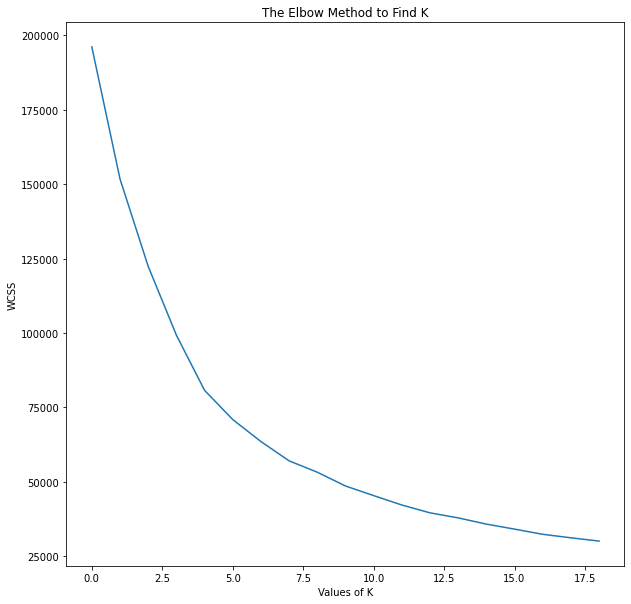

In [91]:
# Create a for loop to calculate the WCSS scores for possible clusters

scores = [] # the list to contain the calculated WCSS scores

range_values = range(1,20) # the range of possible clusters (1-20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_) # append the WCSS scores to the 'scores' list using inertia

# make a plot to visualize the scores and to help identify the optimal k

plt.figure(figsize = (10, 10))
plt.plot(scores)
plt.xlabel('Values of K') 
plt.ylabel('WCSS') 
plt.title('The Elbow Method to Find K') 
plt.show() 

**Observation:** The plot shows that the curve starts to become more linear around the 5 or 6 cluster mark. It therefore seems that the optimal number of clusters will be some value between 5 and 6.

### 5.2 Apply the K-means Clustering Algorithm

Given the observation above, I will assign the numerical value, **5**, to **k**. At this point, I can now implement the K-means clustering algorithm.

In [92]:
# Train the model and create a kmeans object with 5 clusters and feed it the data, 'df_scaled'
kmeans = KMeans(5)
kmeans.fit(df_scaled)

# labels or clusters associated with each data point
labels = kmeans.labels_

In [93]:
# The shape of the array indicating 8 clusters
kmeans.cluster_centers_.shape

(5, 5)

In [94]:
# Create a dataframe consisting of the kmeans.cluster_centers with headers from the column names of the dataframe, df
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_sub.columns])

# Display the dataframe
cluster_centers

,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365)
0,0.032750,0.017635,-0.265710,-0.281860,1.060885
1,-0.081706,-0.032034,-0.306811,-0.298077,-0.812971
2,-0.157565,-0.303661,1.897510,1.896227,0.005771
3,12.402318,-0.057033,-0.525356,-0.152669,0.340688
4,0.179693,9.636032,-0.325282,-0.237986,0.409874


In [95]:
# Scale the data back using inverse transformation to make sense of these numbers and set it to a dataframe
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_sub.columns])

# Display the dataframe
cluster_centers

,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365)
0,240.143556,16.146587,19.875043,1.148118,322.276986
1,177.275201,14.696647,17.058080,1.122273,62.282931
2,135.607685,6.767339,168.137368,4.619201,175.881844
3,7034.483444,13.966887,2.079470,1.354001,222.350993
4,320.856436,296.925743,15.792079,1.218037,231.950495


### 5.3 Identifying and Interpreting Important Clusters

**Key Observations:**

1. The cluster center assigned to index **3** represents *high-end* listings. The center point is characterized as having a high price that is around 7,000 dollars.
2. The cluster center assigned to index **2** represents *popular and quick budget-friendly* listings. That is to say, listings that are close to this point will be fairly cheap (around 135 dollars), and will have low values for the required minimum nights (around 6 or 7 nights). These listings also have many reviews and are therefore popular spots.
3. The cluster center assigned to index **1** seems to represent *affordable longer getaway* listings. The listing is fairly cheap at around 177 dollars. But the required minimum nights are higher than those in our *quick budget-friendly* cluster. It seems that properties in this group will likely require guests to stay for around 2 weeks.
4. The cluster center assigned to label **0** is priced at around 240 dollars, and is therefore more expensive than the centers with indexes *1* and *2*. However, it is not the most expensive listing. It also has the highest *availability* at around 322 days a year. Hence, this cluster center represents *mid-range highly accessible* listings.
5. Finally, the cluster point assigned to label **4** has a value of 296.9 for the number of *required minimum nights*. This is the longest amount of time a guest must stay at the property compared to the other listings. Consequently, this represents the *extended stay* properties in the data.

**Key Segments:**

1. **Extended Stay Listings** (index 4)
2. **High-End Listings** (index 3)
3. **Popular, Quick, Budget-Friendly Listings** (index 2)
4. **Affordable Longer Getaway Listings** (index 1)
5. **Mid-Range Accessible Listings** (index 0)

### 5.4 Segmenting the Data into the Relevant Clusters

In [96]:
# Labels associated with each data point
labels.shape

(39221,)

In [97]:
# max value of labels
labels.max()

4

In [98]:
# min value of labels
labels.min()

0

In [99]:
# Apply the fit_predict method to kmeans and feed it the 'df_scaled' array to get the output, 'y_kmeans'
y_kmeans = kmeans.fit_predict(df_scaled)

# Display y_kmeans
y_kmeans

array([0, 0, 0, ..., 1, 0, 0])

In [100]:
# Display the shape
y_kmeans.shape

(39221,)

In [101]:
# Create a data frame containing the labels
label = pd.DataFrame({"Cluster":labels})
label.head()

,Cluster
0,0
1,0
2,0
3,1
4,2


In [102]:
label.shape

(39221, 1)

**Remark:** So far so good. I can now merge our original data frame, *df*, with the *label* data frame.

In [103]:
# Merge the cluster labels onto the original dataframe, 'df', to create 'df_cluster'
df_cluster = pd.concat([df, pd.DataFrame({"Cluster":labels})], axis = 1)

# Display the first ten rows of the new dataframe, 'df_cluster'
df_cluster.head(10)

,ID,Neighborhood,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Entire Home,Hotel Room,Private Room,Shared Room,Los Angeles,San Diego,Cluster
0,109,Culver City,33.98209,-118.38494,115.0,30.0,2.0,0.0200,207.0,1,0,0,0,1,0,0
1,2708,Hollywood,34.09768,-118.34602,75.0,30.0,27.0,0.3500,335.0,0,0,1,0,1,0,0
2,2732,Santa Monica,34.00475,-118.48127,155.0,1.0,21.0,0.1800,365.0,0,0,1,0,1,0,0
3,2864,Bellflower,33.87619,-118.11397,50.0,30.0,0.0,1.5973,0.0,1,0,0,0,1,0,1
4,5729,Del Rey,33.98750,-118.43200,70.0,30.0,230.0,1.6900,358.0,0,0,1,0,1,0,2
5,5843,Del Rey,33.98750,-118.43200,135.0,30.0,128.0,1.1200,97.0,1,0,0,0,1,0,1
6,6931,Hollywood,34.09521,-118.34801,73.0,30.0,22.0,0.1600,344.0,0,0,1,0,1,0,0
7,7874,Bellflower,33.87610,-118.11509,55.0,1.0,12.0,0.5500,147.0,0,0,1,0,1,0,1
8,7992,Atwater Village,34.11543,-118.26090,89.0,30.0,241.0,2.2000,39.0,1,0,0,0,1,0,2
9,8770,Venice,33.99399,-118.45637,122.0,3.0,401.0,3.0200,200.0,1,0,0,0,1,0,2


In [104]:
# Display the last 10 rows 
df_cluster.tail(10)

,ID,Neighborhood,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Entire Home,Hotel Room,Private Room,Shared Room,Los Angeles,San Diego,Cluster
39211,46025964,Gaslamp Quarter,32.707570,-117.159880,103.0,30.0,0.0,1.5973,338.0,1,0,0,0,0,1,0
39212,46026261,Northwest,32.626770,-117.068100,63.0,1.0,0.0,1.5973,84.0,0,0,1,0,0,1,1
39213,46026275,Linda Vista,32.767540,-117.179320,26.0,1.0,0.0,1.5973,65.0,0,0,1,0,0,1,1
39214,46027044,Sunbow,32.617960,-117.020720,64.0,1.0,0.0,1.5973,144.0,1,0,0,0,0,1,1
39215,46027533,Serra Mesa,32.809070,-117.141760,147.0,30.0,0.0,1.5973,326.0,1,0,0,0,0,1,0
39216,46028900,Pacific Beach,32.797710,-117.229690,70.0,4.0,0.0,1.5973,9.0,1,0,0,0,0,1,1
39217,46035696,East Village,32.713790,-117.150310,214.0,1.0,0.0,1.5973,162.0,1,0,0,0,0,1,1
39218,46036151,East Village,32.711490,-117.151210,214.0,1.0,0.0,1.5973,162.0,1,0,0,0,0,1,1
39219,46037988,Balboa Park,32.723900,-117.131330,286.0,2.0,0.0,1.5973,364.0,1,0,0,0,0,1,0
39220,46038206,Pacific Beach,32.805396,-117.219775,74.0,1.0,0.0,1.5973,358.0,1,0,0,0,0,1,0


In [105]:
# Display the shape
df_cluster.shape

(39221, 16)

## 6. The Distribution of Values For Each Cluster

I can create histograms that show the distributions of features for individual clusters.

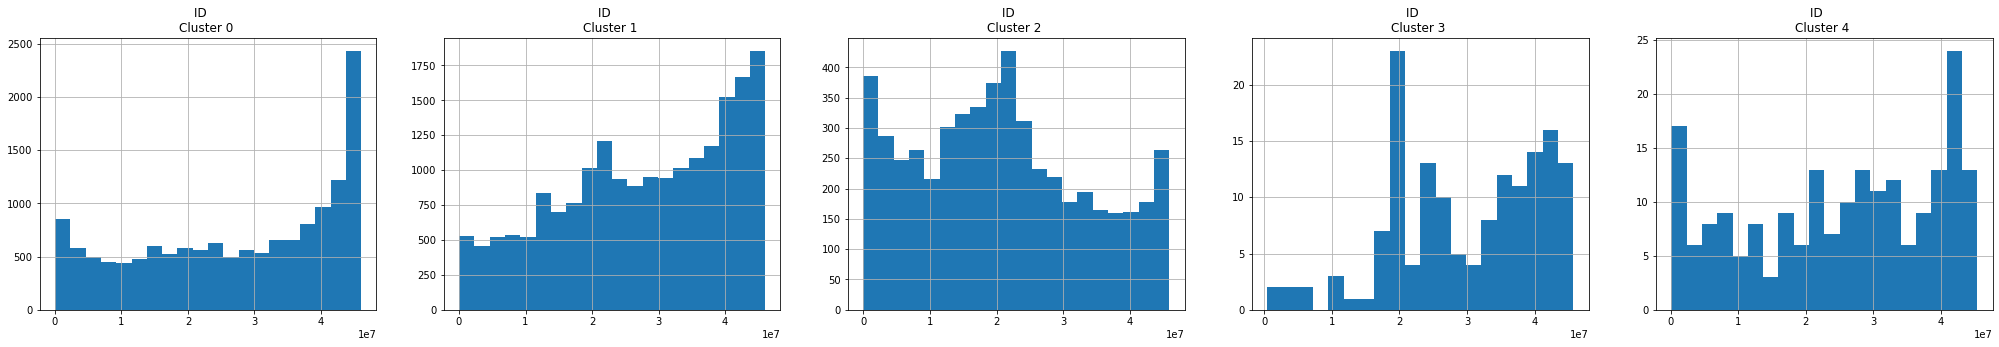

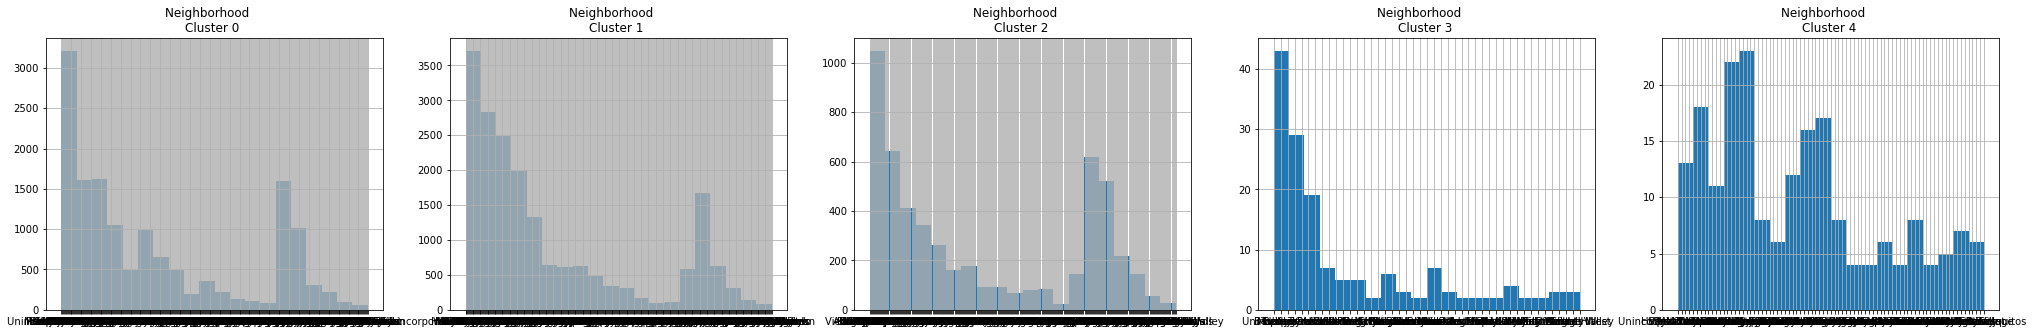

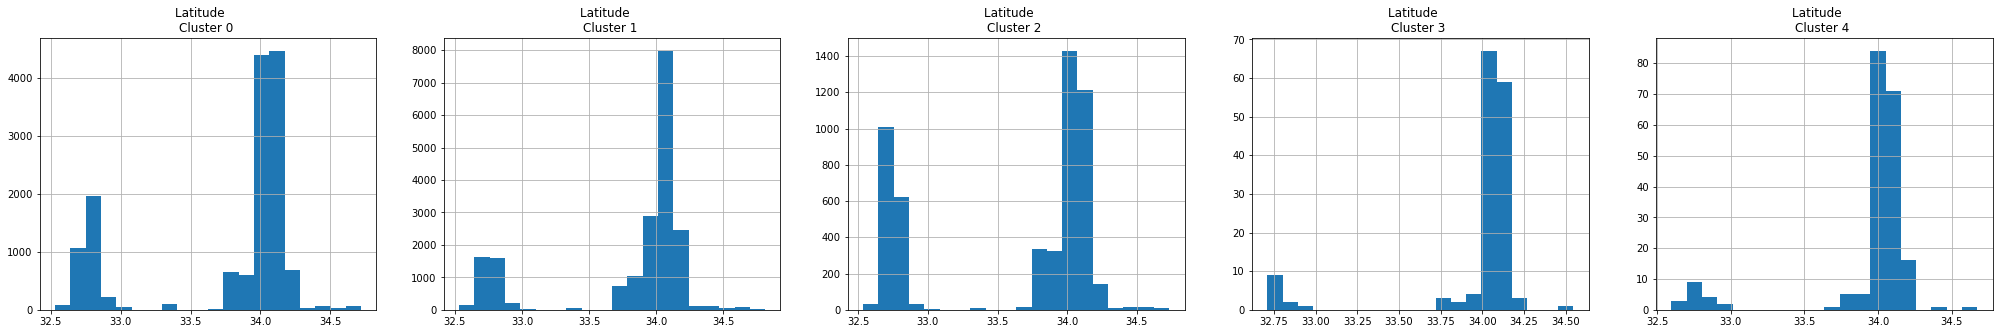

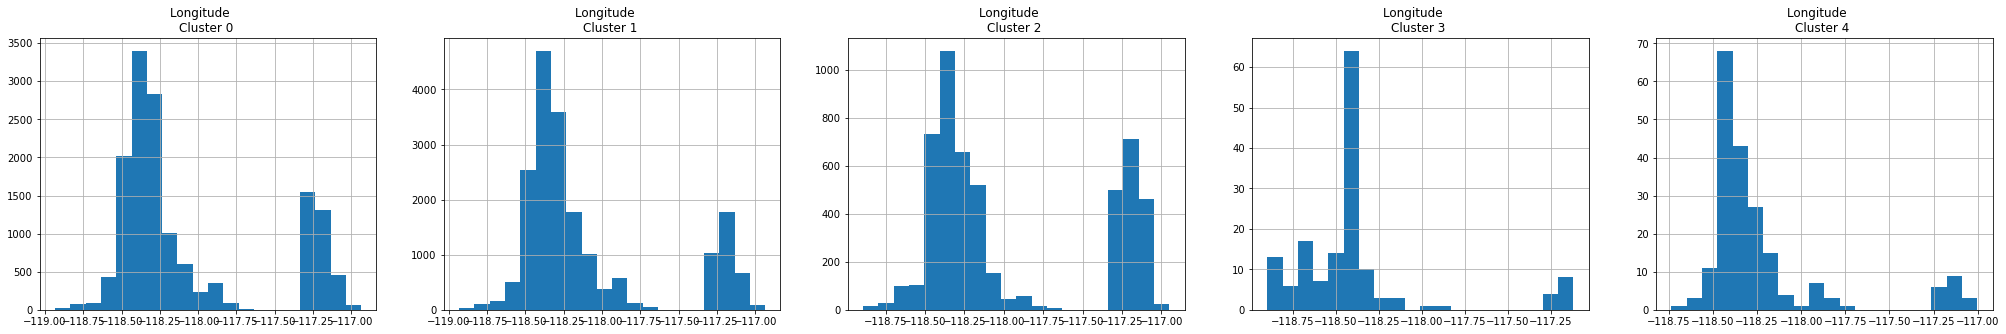

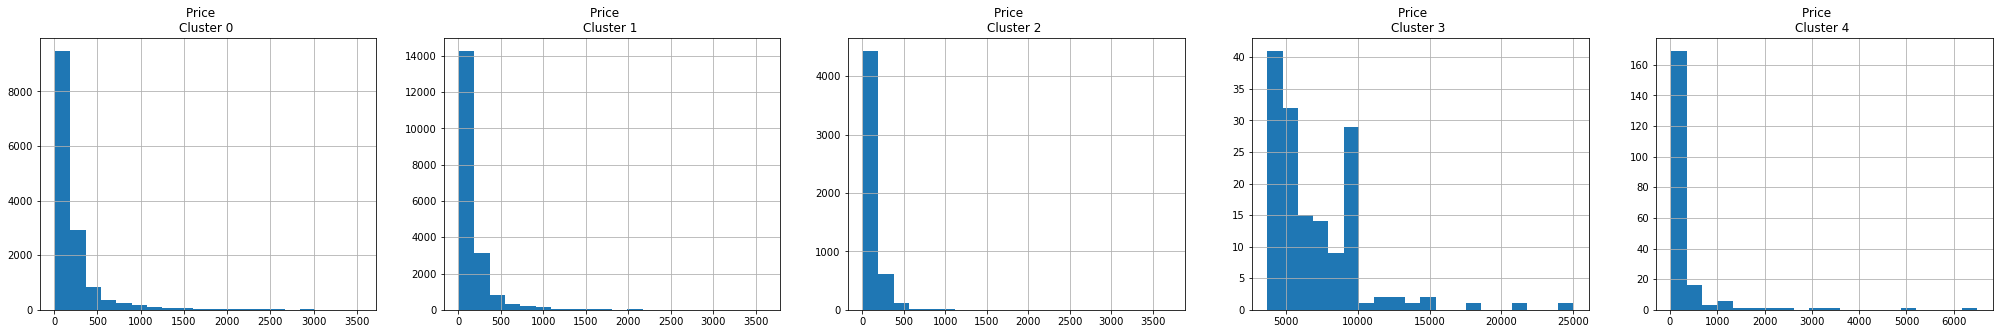

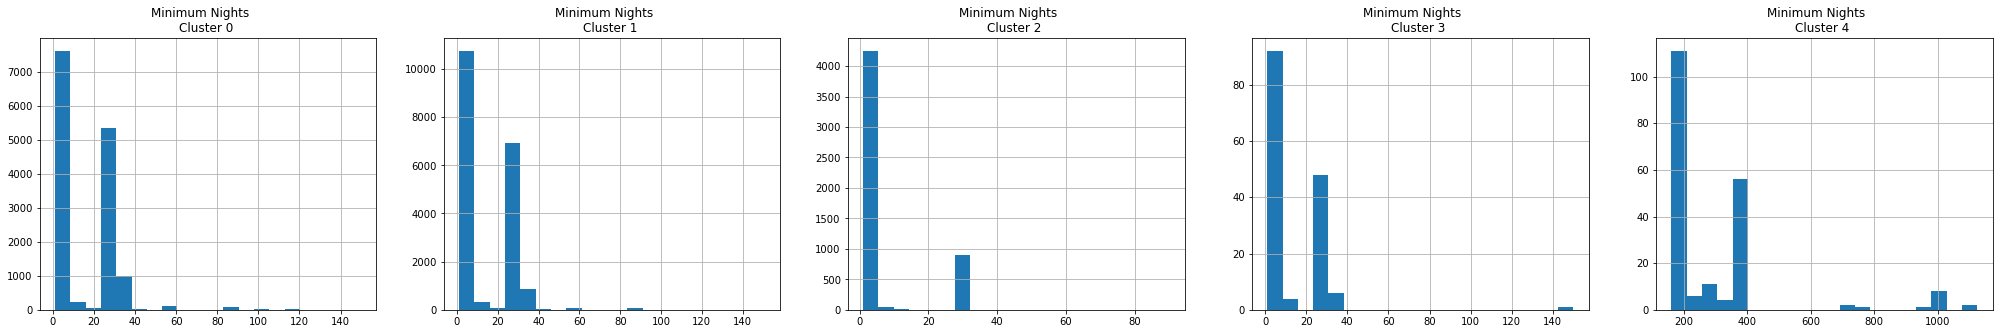

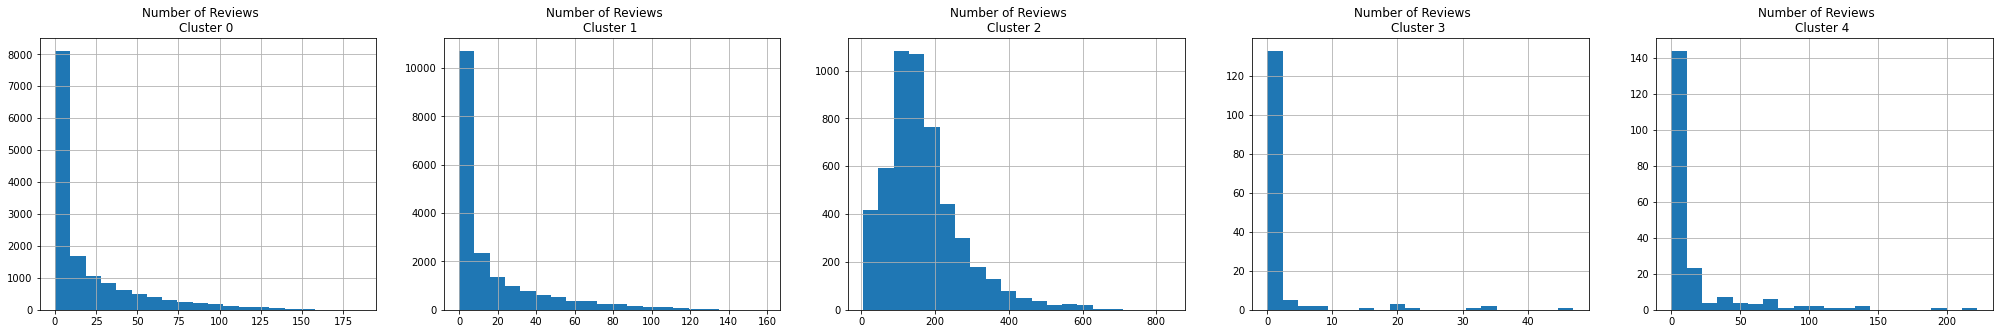

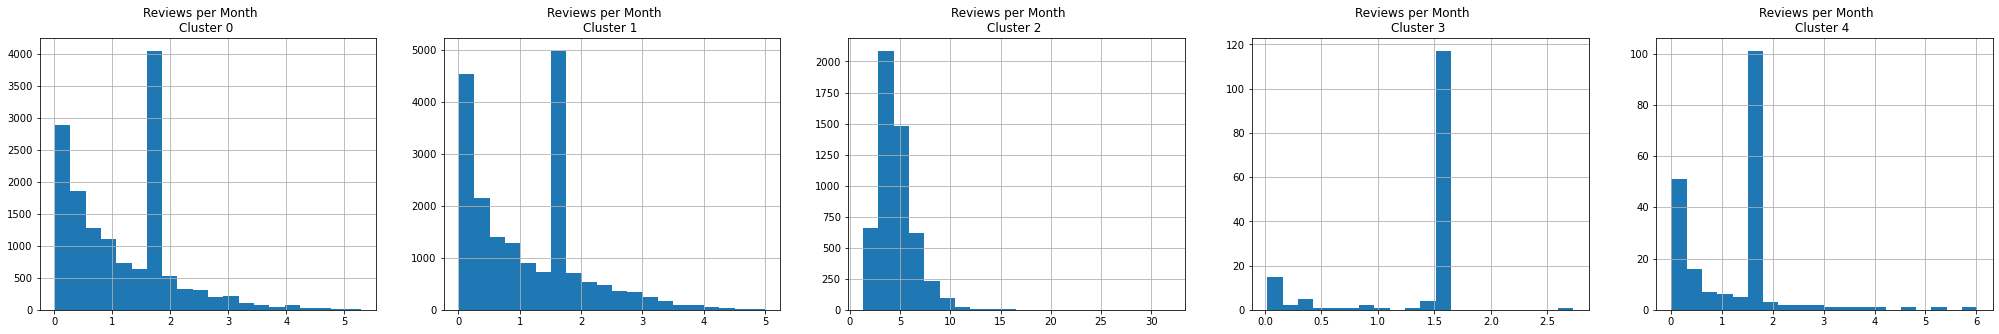

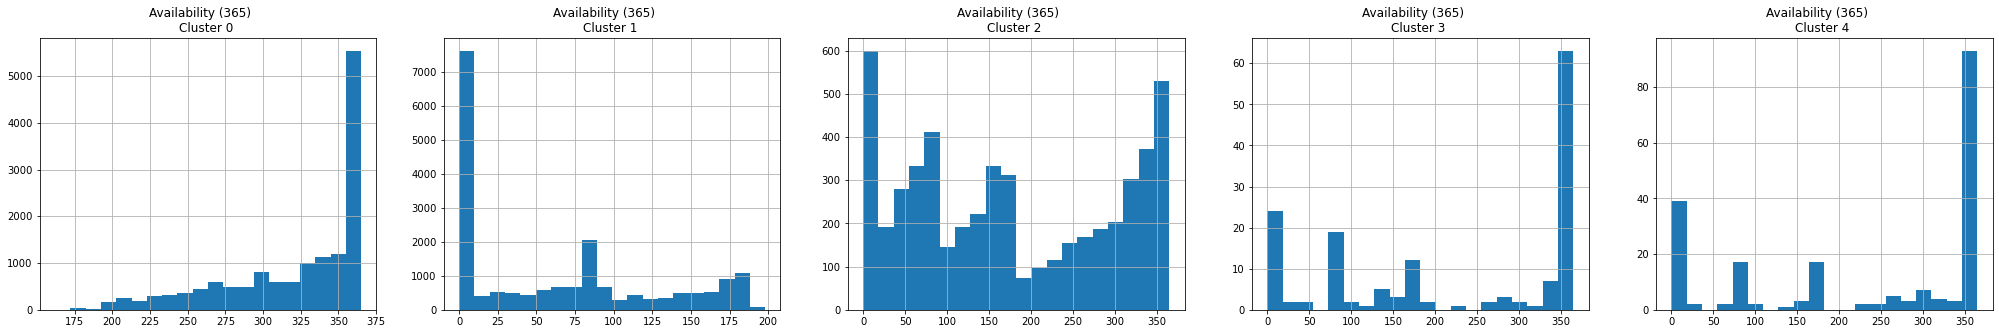

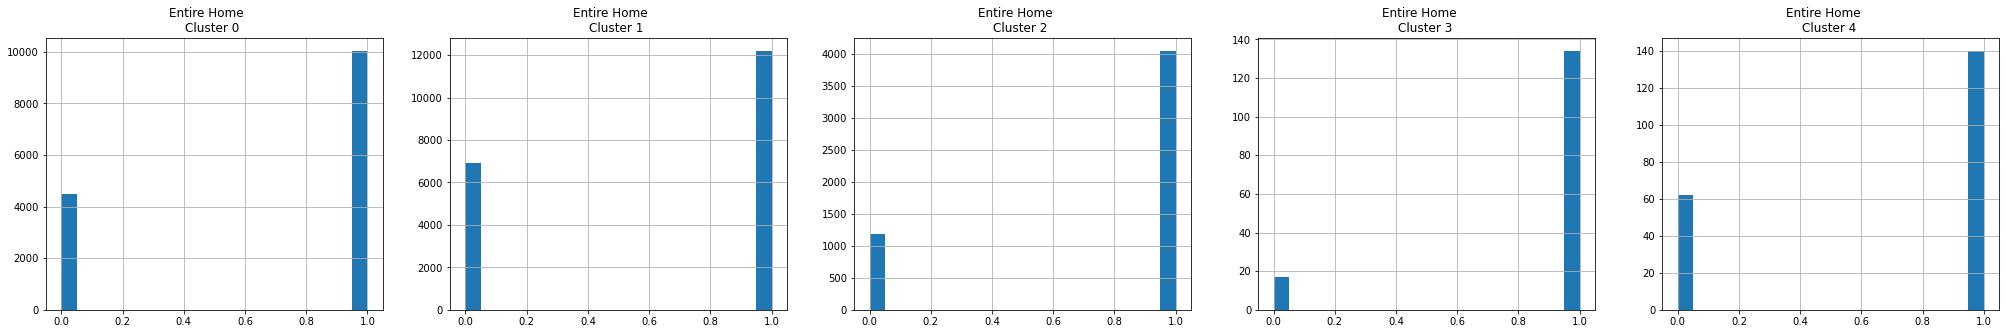

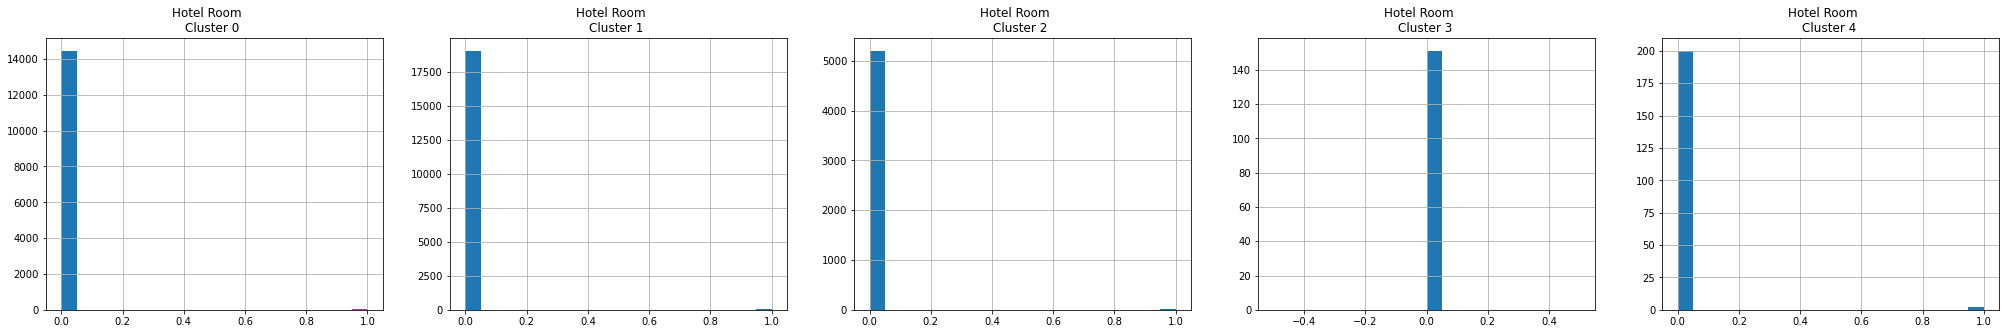

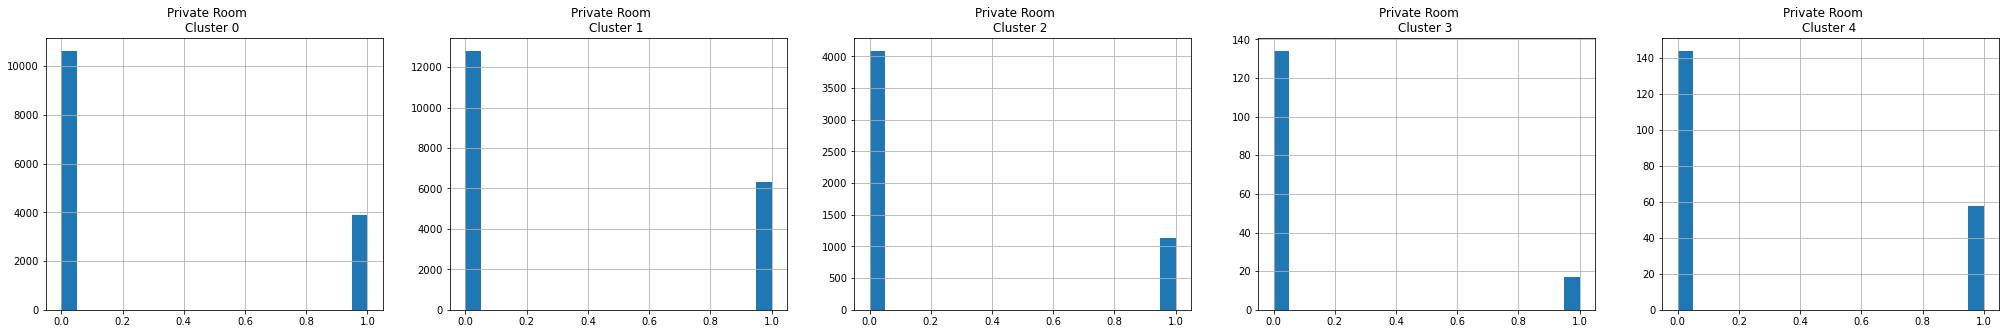

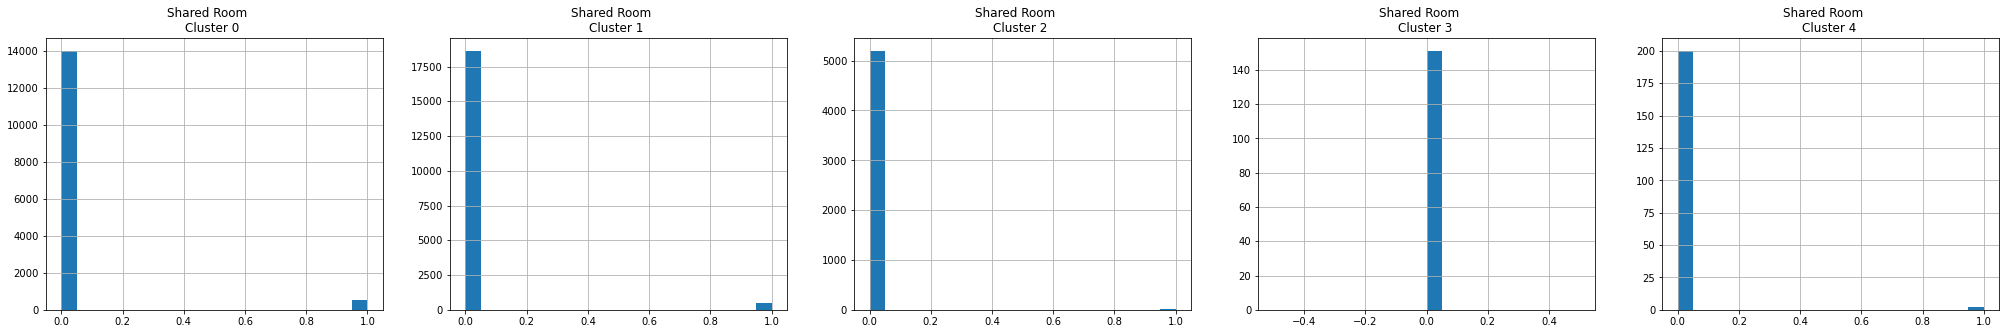

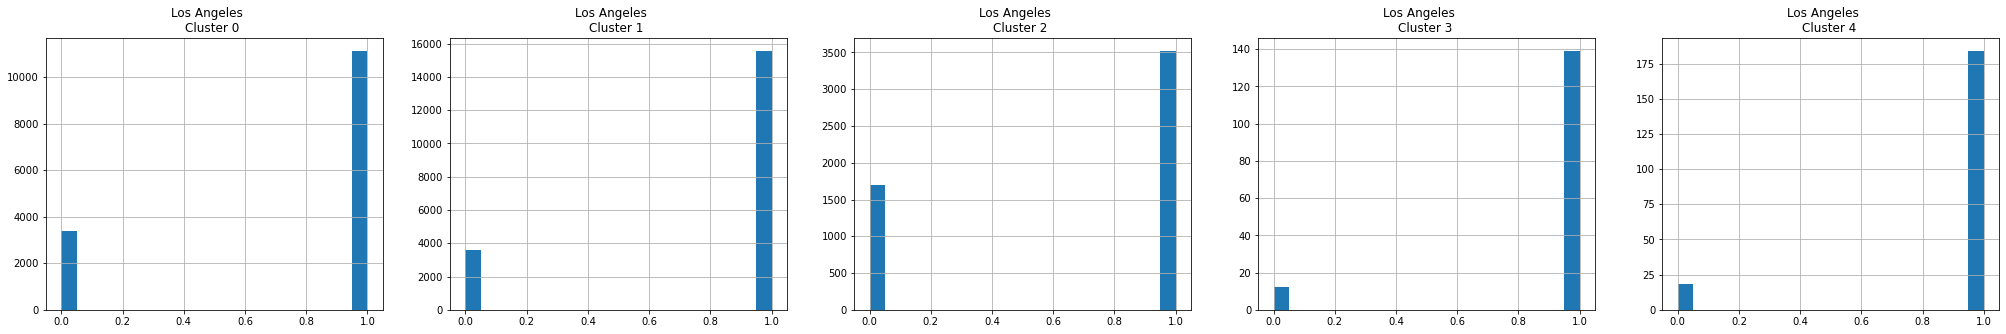

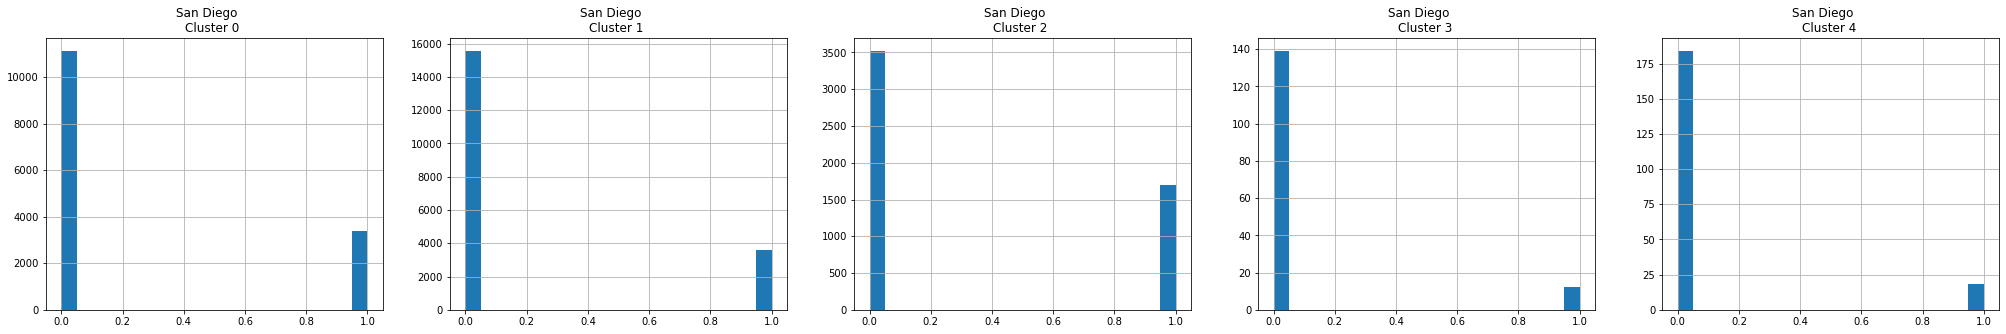

In [106]:
# Plotting the histograms associated with each cluster
for i in df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(5):
        plt.subplot(1,5,j+1)
        cluster = df_cluster[df_cluster["Cluster"] == j]
        cluster[i].hist(bins = 20)
        plt.title("{}    \nCluster {} ".format(i,j))
  
    plt.show()

## 7. Rename the Cluster Labels

Given my **key observations** above, I can replace the numeric cluster labels with descriptions that provide meaningful information regarding the key features with the relevant clusters. I will use the labels I created in the **Key Segments** sub-section of part 5.3.

In [107]:
# Replace numeric cluster values with unique descriptions that apply to the relevant cluster features
df_cluster["Cluster"].replace(0, "Mid-Range Accessible", inplace = True)
df_cluster["Cluster"].replace(1, "Affordable Longer Getaway", inplace = True)
df_cluster["Cluster"].replace(2, "Popular, Quick, Budget-Friendly", inplace = True)
df_cluster["Cluster"].replace(3, "High-End Listing", inplace = True)
df_cluster["Cluster"].replace(4, "Extended Stay", inplace = True)

# Display the first five rows of the updated data frame
df_cluster.head()

,ID,Neighborhood,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Entire Home,Hotel Room,Private Room,Shared Room,Los Angeles,San Diego,Cluster
0,109,Culver City,33.98209,-118.38494,115.0,30.0,2.0,0.0200,207.0,1,0,0,0,1,0,Mid-Range Accessible
1,2708,Hollywood,34.09768,-118.34602,75.0,30.0,27.0,0.3500,335.0,0,0,1,0,1,0,Mid-Range Accessible
2,2732,Santa Monica,34.00475,-118.48127,155.0,1.0,21.0,0.1800,365.0,0,0,1,0,1,0,Mid-Range Accessible
3,2864,Bellflower,33.87619,-118.11397,50.0,30.0,0.0,1.5973,0.0,1,0,0,0,1,0,Affordable Longer Getaway
4,5729,Del Rey,33.98750,-118.43200,70.0,30.0,230.0,1.6900,358.0,0,0,1,0,1,0,"Popular, Quick, Budget-Friendly"


In [108]:
# Display the last five rows
df_cluster.tail()

,ID,Neighborhood,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Entire Home,Hotel Room,Private Room,Shared Room,Los Angeles,San Diego,Cluster
39216,46028900,Pacific Beach,32.797710,-117.229690,70.0,4.0,0.0,1.5973,9.0,1,0,0,0,0,1,Affordable Longer Getaway
39217,46035696,East Village,32.713790,-117.150310,214.0,1.0,0.0,1.5973,162.0,1,0,0,0,0,1,Affordable Longer Getaway
39218,46036151,East Village,32.711490,-117.151210,214.0,1.0,0.0,1.5973,162.0,1,0,0,0,0,1,Affordable Longer Getaway
39219,46037988,Balboa Park,32.723900,-117.131330,286.0,2.0,0.0,1.5973,364.0,1,0,0,0,0,1,Mid-Range Accessible
39220,46038206,Pacific Beach,32.805396,-117.219775,74.0,1.0,0.0,1.5973,358.0,1,0,0,0,0,1,Mid-Range Accessible


In [109]:
# Display the shape 
df_cluster.shape

(39221, 16)

**Remark:** The data frame, 'df_cluster', now contains meaningful cluster labels. These labels help identify groups of listings that share common features associated with *price*, *accessibiliy*, *popularity*, and *minimum nights*.

## 8. Apply Principal Component Analysis

Principle Component Analysis (PCA) is an unsupervised Machine Learning algorithm that performs dimensionality reduction. PCA identifies new features called 'components' that are composites of the uncorrelated input features. The reduction preserves the original information while allowing for a simpler representation.

In [113]:
# Specify the number of principal components and apply PCA to the 'df_scaled' array
pca = PCA(n_components = 2) # This gives us 2 components
principal_comp = pca.fit_transform(df_scaled) # Here we feed in the 'df_scaled' array
principal_comp # Visualizes/gives the array with only 2 components

array([[-1.12783986,  0.0376831 ],
       [-0.7105588 ,  0.72775468],
       [-0.61785297,  0.78640494],
       ...,
       [-0.25968481, -0.20603587],
       [-0.25055522,  0.9827722 ],
       [-0.20311725,  0.70426443]])

In [114]:
# Create a dataframe with two columns: pc1 and pc2
pca_df = pd.DataFrame(data = principal_comp, columns = ["PCA1", "PCA2"])

# Display the first five rows
pca_df.head()

,PCA1,PCA2
0,-1.127840,0.037683
1,-0.710559,0.727755
2,-0.617853,0.786405
3,-0.489302,-1.092407
4,1.885870,1.089392


In [115]:
# Let's now concatenate the cluster labels to the 'pca_df' dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({"Cluster": labels})], axis = 1)

# Display the first five rows
pca_df.head()

,PCA1,PCA2,Cluster
0,-1.127840,0.037683,0
1,-0.710559,0.727755,0
2,-0.617853,0.786405,0
3,-0.489302,-1.092407,1
4,1.885870,1.089392,2


In [116]:
# Change the numeric values under the 'Cluster' column to the detailed cluster descriptions
pca_df["Cluster"].replace(0, "Mid-Range Accessible", inplace = True)
pca_df["Cluster"].replace(1, "Affordable Longer Getaway", inplace = True)
pca_df["Cluster"].replace(2, "Popular, Quick, Budget-Friendly", inplace = True)
pca_df["Cluster"].replace(3, "High-End Listing", inplace = True)
pca_df["Cluster"].replace(4, "Extended Stay", inplace = True)

# Display the first five rows
pca_df.head()

,PCA1,PCA2,Cluster
0,-1.127840,0.037683,Mid-Range Accessible
1,-0.710559,0.727755,Mid-Range Accessible
2,-0.617853,0.786405,Mid-Range Accessible
3,-0.489302,-1.092407,Affordable Longer Getaway
4,1.885870,1.089392,"Popular, Quick, Budget-Friendly"


## 9. Advanced Visualizations

My data preparation and analysis allows for more interesting data visualizations.

### 9.1 Visualizing the Clusters

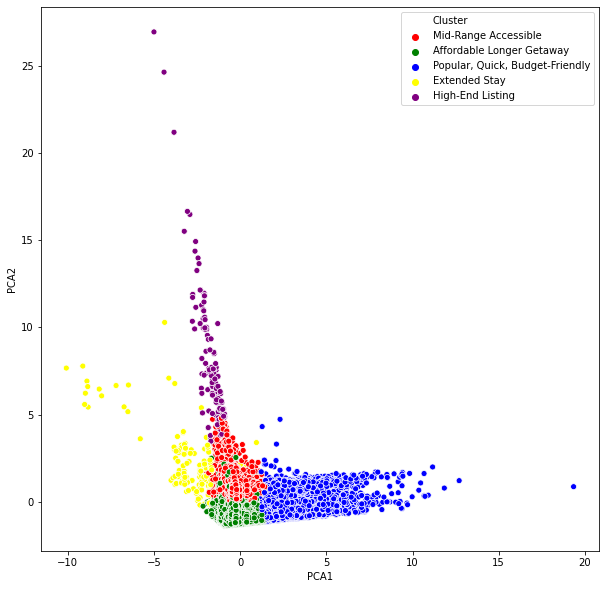

In [117]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue = "Cluster", data = pca_df, palette =["red","green","blue", "yellow","purple"])
plt.show()

### 9.2 Heat Map of Correlations

It might be interesting to create a heat map of the various correlations that hold between the variables.

In [118]:
# Display the correlations
df_cluster.corr()

,ID,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Entire Home,Hotel Room,Private Room,Shared Room,Los Angeles,San Diego
ID,1.000000,-0.018647,0.036179,0.032167,-0.042045,-0.401084,0.098997,0.036632,0.024960,0.005212,-0.041415,0.041743,-0.012847,0.012847
Latitude,-0.018647,1.000000,-0.934803,-0.008748,0.185279,-0.083925,-0.125076,-0.043530,-0.139619,0.001893,0.122798,0.057580,0.974878,-0.974878
Longitude,0.036179,-0.934803,1.000000,-0.037655,-0.197437,0.067653,0.112522,0.032679,0.074729,-0.009883,-0.054524,-0.058418,-0.951669,0.951669
Price,0.032167,-0.008748,-0.037655,1.000000,-0.001220,-0.074231,-0.036527,0.064144,0.154311,-0.004962,-0.140284,-0.049712,-0.010986,0.010986
Minimum Nights,-0.042045,0.185279,-0.197437,-0.001220,1.000000,-0.103628,-0.144311,0.039518,0.027808,-0.023456,-0.035415,0.028680,0.177416,-0.177416
Number of Reviews,-0.401084,-0.083925,0.067653,-0.074231,-0.103628,1.000000,0.656772,0.026781,0.065468,0.000334,-0.042994,-0.068228,-0.078379,0.078379
Reviews per Month,0.098997,-0.125076,0.112522,-0.036527,-0.144311,0.656772,1.000000,0.018839,0.106986,-0.001857,-0.091831,-0.050281,-0.114621,0.114621
Availability (365),0.036632,-0.043530,0.032679,0.064144,0.039518,0.026781,0.018839,1.000000,0.026986,0.002556,-0.045809,0.049286,-0.049969,0.049969
Entire Home,0.024960,-0.139619,0.074729,0.154311,0.027808,0.065468,0.106986,0.026986,1.000000,-0.098002,-0.927983,-0.242157,-0.135520,0.135520
Hotel Room,0.005212,0.001893,-0.009883,-0.004962,-0.023456,0.000334,-0.001857,0.002556,-0.098002,1.000000,-0.043413,-0.011329,0.014257,-0.014257


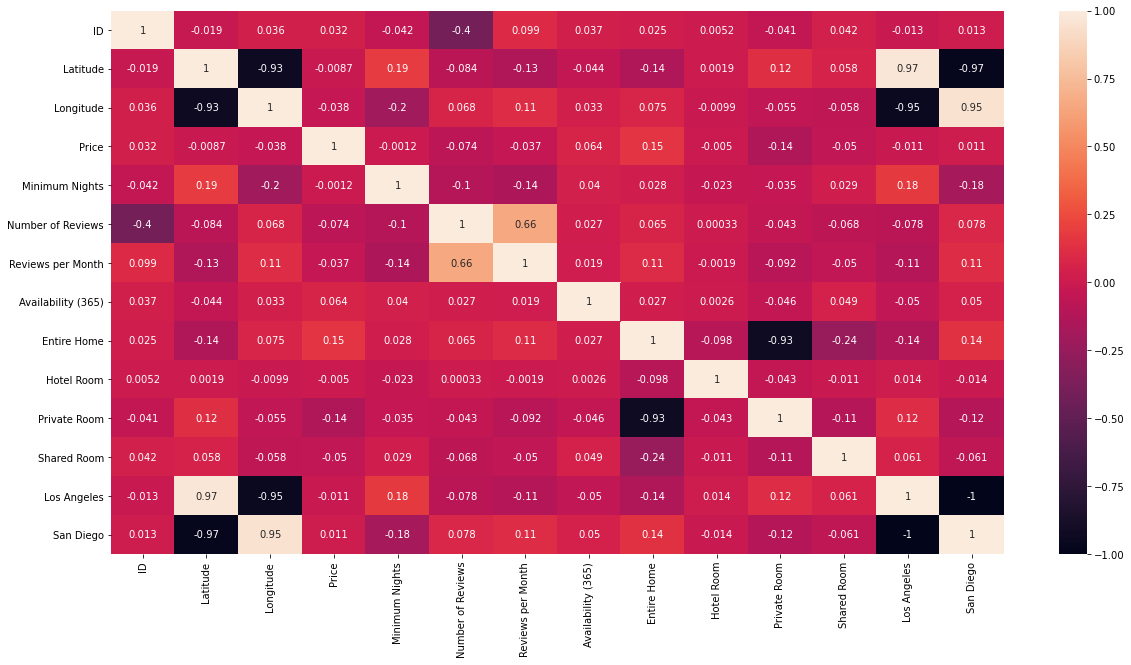

In [119]:
# Construct a heat map that visualizes the correlations
correlations = df_cluster.corr()

f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlations, annot=True)

**Observations:** There doesn't sem to be any surprising or interesting strong correlations. Originally, I suspected that there might be a moderate or strong correlation between *Price* and *Number of Reviews*. But this does not seem to be the case. Similarly, there does not seem to be any interesting correlation between *Minimum Nights* and *Price*.

### 9.3 Preparing the Data Frame for Advanced Visualizations

Before I can construct more visualizations, I first need to modify the data frame by adding an 'Area' column and converting the relevant numerical values into their associated strings, "Los Angeles" and "San Diego".

In [120]:
# Drop the 'San Diego' column
df_final = df_cluster[["ID", "Neighborhood", "Latitude", "Longitude", "Price", "Minimum Nights", "Number of Reviews", "Reviews per Month", "Availability (365)", "Entire Home", "Hotel Room", "Private Room", "Shared Room", "Los Angeles", "Cluster"]]

# Display the columns
df_final.columns

Index(['ID', 'Neighborhood', 'Latitude', 'Longitude', 'Price',
       'Minimum Nights', 'Number of Reviews', 'Reviews per Month',
       'Availability (365)', 'Entire Home', 'Hotel Room', 'Private Room',
       'Shared Room', 'Los Angeles', 'Cluster'],
      dtype='object')

In [121]:
# convert the 'Los Angeles' column to 'string; data type (i.e., object)
df_final["Los Angeles"] = df_final["Los Angeles"].astype(str)

# Check the data types
df_final.dtypes

ID                      int64
Neighborhood           object
Latitude              float64
Longitude             float64
Price                 float64
Minimum Nights        float64
Number of Reviews     float64
Reviews per Month     float64
Availability (365)    float64
Entire Home             uint8
Hotel Room              uint8
Private Room            uint8
Shared Room             uint8
Los Angeles            object
Cluster                object
dtype: object

In [122]:
# Convernt every instance of '1' in the "Los Angeles" column to the string, "Los Angeles"
df_final["Los Angeles"].replace("1", "Los Angeles", inplace = True)

# Convert every instance of '0' in the "Los Angeles" column to the string, "San Diego"
df_final["Los Angeles"].replace("0", "San Diego", inplace = True)

# Change the name of the column to 'Area'
df_final.rename(columns={"Los Angeles": "Area"}, inplace = True)

# Check the column
df_final.columns

Index(['ID', 'Neighborhood', 'Latitude', 'Longitude', 'Price',
       'Minimum Nights', 'Number of Reviews', 'Reviews per Month',
       'Availability (365)', 'Entire Home', 'Hotel Room', 'Private Room',
       'Shared Room', 'Area', 'Cluster'],
      dtype='object')

In [123]:
# Check the first five rows
df_final.head()

,ID,Neighborhood,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Entire Home,Hotel Room,Private Room,Shared Room,Area,Cluster
0,109,Culver City,33.98209,-118.38494,115.0,30.0,2.0,0.0200,207.0,1,0,0,0,Los Angeles,Mid-Range Accessible
1,2708,Hollywood,34.09768,-118.34602,75.0,30.0,27.0,0.3500,335.0,0,0,1,0,Los Angeles,Mid-Range Accessible
2,2732,Santa Monica,34.00475,-118.48127,155.0,1.0,21.0,0.1800,365.0,0,0,1,0,Los Angeles,Mid-Range Accessible
3,2864,Bellflower,33.87619,-118.11397,50.0,30.0,0.0,1.5973,0.0,1,0,0,0,Los Angeles,Affordable Longer Getaway
4,5729,Del Rey,33.98750,-118.43200,70.0,30.0,230.0,1.6900,358.0,0,0,1,0,Los Angeles,"Popular, Quick, Budget-Friendly"


In [124]:
# Examine the last five rows of the data frame
df_final.tail()

,ID,Neighborhood,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Availability (365),Entire Home,Hotel Room,Private Room,Shared Room,Area,Cluster
39216,46028900,Pacific Beach,32.797710,-117.229690,70.0,4.0,0.0,1.5973,9.0,1,0,0,0,San Diego,Affordable Longer Getaway
39217,46035696,East Village,32.713790,-117.150310,214.0,1.0,0.0,1.5973,162.0,1,0,0,0,San Diego,Affordable Longer Getaway
39218,46036151,East Village,32.711490,-117.151210,214.0,1.0,0.0,1.5973,162.0,1,0,0,0,San Diego,Affordable Longer Getaway
39219,46037988,Balboa Park,32.723900,-117.131330,286.0,2.0,0.0,1.5973,364.0,1,0,0,0,San Diego,Mid-Range Accessible
39220,46038206,Pacific Beach,32.805396,-117.219775,74.0,1.0,0.0,1.5973,358.0,1,0,0,0,San Diego,Mid-Range Accessible


In [125]:
# Check the number of unique values in the 'Area' column
df_final["Area"].value_counts()

Los Angeles    30533
San Diego       8688
Name: Area, dtype: int64

### 9.4 Geospatial Visualizations of the Clusters

The data frame contains coordinates for the individual Airbnb listings. As such, I can plot these listings on a map. Each listing will have a label that displays its associated cluster and its ID number.

#### Coordinates for Southern California

In [126]:
# Assign the coordinates for the Southern California area to variables
latitude = 33.6700
longitude = -117.7800

#### Basic Map of Southern California

In [ ]:
# Create a base map with the coordinates for Southern California
sc = folium.Map(location = [latitude, longitude], zoom_start=7)

# Display the map
sc

#### Interactive Map of the Different Clusters of Airbnb Listings

I'll now construct a map with folium. This will be an interactive map that displays the locations of the Airbnb listings from the data frame. You can zoom into parts of the map and click on different property markers to reveal (1) the listing's cluster category/label, and (2) the listing's ID for reference.

In [ ]:
# Create a map of Southern California
sc_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# Create a mark cluster object for the individual listings in the data
listings = plugins.MarkerCluster().add_to(sc_clusters)

# Add markers to the map using a for loop
for lat, ln, label, identity, in zip(df_final.Latitude, df_final.Longitude, df_final.Cluster, df_final.ID):
    folium.Marker(
        location = [lat, ln],
        icon = None,
        popup = (label + ", " + str(identity)),
    ).add_to(listings)

# Display the map
sc_clusters

### 9.5 Visualizing the Difference Between Property Types in Different Metropolitan Areas

I will now proceed to create several plots that successfully illuminate interesting features of the data.

#### Categorical Scatter Plot

Let's construct a categorical scatter plot that shows the distribution of property types and their relation to price.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

<Figure size 720x720 with 0 Axes>

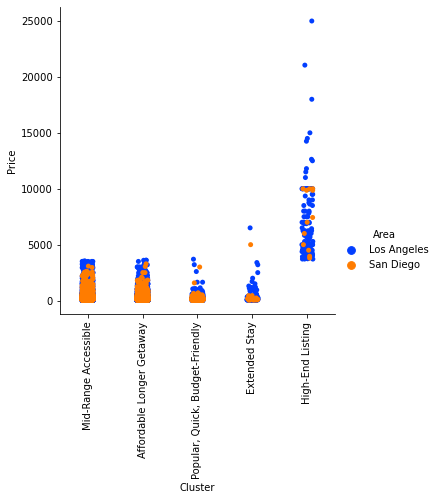

In [130]:
# Create the categorical scatter plot
plt.figure(figsize=(10, 10))
sns.catplot(x="Cluster", y="Price", hue = "Area", palette = "bright", data = df_final)
plt.xticks(rotation=90)

#### Boxen plot

I'll also create a plot using the *boxen()* function that will provide more insight into the shape of the distributions.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

<Figure size 720x720 with 0 Axes>

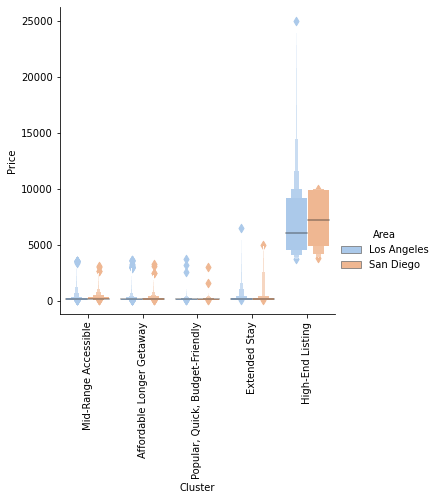

In [131]:
# Create the categorical scatter plot
plt.figure(figsize=(10, 10))
sns.catplot(x="Cluster", y="Price", hue = "Area", kind = "boxen", palette = "pastel", data = df_final)
plt.xticks(rotation=90)

#### Bar Plot

Next, I'll create a bar plot to visualize the relationship between the values associated with the variable, *Minimum Nights*, and the different clusters of properties within the Los Angeles and San Diego areas.

<Figure size 720x720 with 0 Axes>

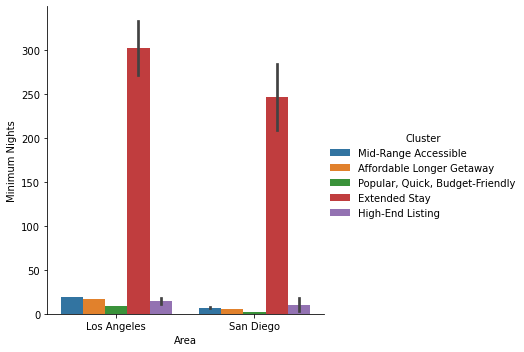

In [132]:
# Create the bar plot
plt.figure(figsize=(10, 10))
sns.catplot(x="Area", y="Minimum Nights", hue="Cluster", kind="bar", data = df_final)

#### Violin Plots

I can construct several violin plots. These plots are similar to box plots, in that they will show the median, interquartile ranges, the minimum value, and the maximum value. However, a violin plot also incorporates a kernal density plot to visualize the entire distribution of the data.

<Figure size 720x720 with 0 Axes>

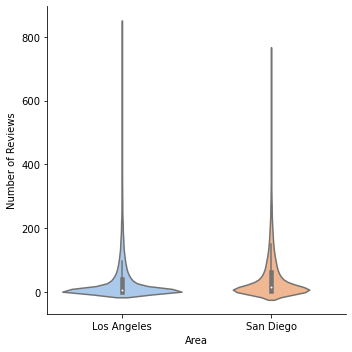

In [133]:
# Violin plot showing the distribution of reviews associated with different areas
plt.figure(figsize=(10, 10))
sns.catplot(x="Area", y="Number of Reviews", kind="violin", split=True, palette="pastel", data = df_final)

<Figure size 720x720 with 0 Axes>

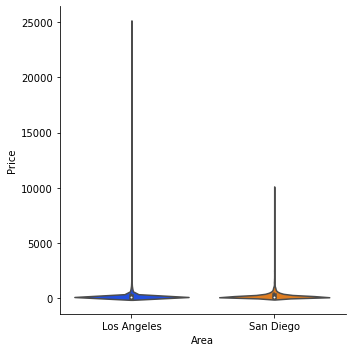

In [134]:
# Violin plot showing the distribution of prices associated with different areas
plt.figure(figsize=(10, 10))
sns.catplot(x="Area", y="Price", kind="violin", split=True, palette="bright", data = df_final)

#### Count Plots

Now, let's look at some count plots that show the number of available property types in Southern California.

<Figure size 720x720 with 0 Axes>

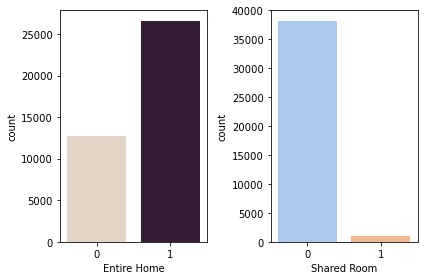

In [135]:
# Count plots for Entire Home and Shared Room
plt.figure(figsize=(10, 10))
fig, ax =plt.subplots(1, 2)
sns.countplot(df_final['Entire Home'], palette = "ch:.25", ax=ax[0])
sns.countplot(df_final['Shared Room'], palette = "pastel", ax=ax[1])

fig.tight_layout()


<Figure size 720x720 with 0 Axes>

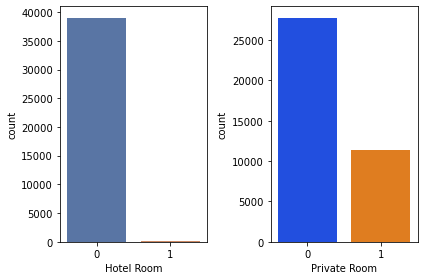

In [136]:
# Count plots for Hotel Room and Private Room
plt.figure(figsize=(10, 10))
fig, ax =plt.subplots(1, 2)
sns.countplot(df_final["Hotel Room"], palette = "deep", ax=ax[0])
sns.countplot(df_final["Private Room"], palette = "bright", ax=ax[1])
fig.tight_layout()

## 10. Summary and Results

In this project, I successfully leveraged machine learning algorithms to perform market segmentation on Airbnb listings in the Los Angeles and San Diego areas. After cleansing several Airbnb datasets, I conducted exploratory data analysis. I then employed *K-means Clustering* and *Principal Component Analysis* to identfiy several interesting segments with shared features. These shared features included things like *price*, *availability*, *popularity*, and *minimum number of nights*. After grouping individual listings into their appropriate clusters, I constructed several advanced geospatial visualizations and plots that illuminated interesting aspects of the data.

The project identified the following **key segments**:

1. **Extended Stay Listings**
2. **High-End Listings**
3. **Popular, Quick, Budget-Friendly Listings**
4. **Affordable Longer Getaway Listings**
5. **Mid-Range Accessible Listings**

This project is beneficial for several reasons. It successfully addresses the primary business problem and achieves the overall buisness aim. The key segments that I identified can help Airbnb craft usefull marketing strategies and promotions that effectively target customers.